In [159]:
import numpy as np
import pandas as pd
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler



# Visualization libraries
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import yellowbrick as yb
from matplotlib.colors import ListedColormap
from yellowbrick.classifier import ROCAUC
from matplotlib_venn import venn3
import matplotlib.patches as mpatches

color= "Spectral"
color_plt = ListedColormap(sns.color_palette(color).as_hex())
color_hist = 'teal'
two_colors = [ sns.color_palette(color)[0], sns.color_palette(color)[5]]
three_colors = [ sns.color_palette(color)[5],sns.color_palette(color)[2], sns.color_palette(color)[0]]



In [160]:
breast = pd.read_csv('METABRIC_RNA_Mutation.csv')
breast.head()

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0


In [161]:
breast.shape

(1904, 693)

In [162]:
breast.describe()

,patient_id,age_at_diagnosis,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,...,srd5a1,srd5a2,srd5a3,st7,star,tnk2,tulp4,ugt2b15,ugt2b17,ugt2b7
count,1904.000000,1904.000000,1904.000000,1904.000000,1832.000000,1904.000000,1904.000000,1859.000000,1904.000000,1904.000000,...,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1904.000000,1.904000e+03,1.904000e+03,1.904000e+03,1904.000000,1.904000e+03
mean,3921.982143,61.087054,0.207983,2.643908,2.415939,0.616597,2.002101,5.697687,4.033019,125.121324,...,4.726891e-07,-3.676471e-07,-9.453782e-07,-1.050420e-07,-0.000002,3.676471e-07,4.726891e-07,7.878151e-07,0.000000,3.731842e-18
std,2358.478332,12.978711,0.405971,1.228615,0.650612,0.486343,4.079993,4.058778,1.144492,76.334148,...,1.000263e+00,1.000262e+00,1.000262e+00,1.000263e+00,1.000262,1.000264e+00,1.000262e+00,1.000263e+00,1.000262,1.000262e+00
min,0.000000,21.930000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,-2.120800e+00,-3.364800e+00,-2.719400e+00,-4.982700e+00,-2.981700,-3.833300e+00,-3.609300e+00,-1.166900e+00,-2.112600,-1.051600e+00
25%,896.500000,51.375000,0.000000,1.000000,2.000000,0.000000,0.000000,3.000000,3.046000,60.825000,...,-6.188500e-01,-6.104750e-01,-6.741750e-01,-6.136750e-01,-0.632900,-6.664750e-01,-7.102000e-01,-5.058250e-01,-0.476200,-7.260000e-01
50%,4730.500000,61.770000,0.000000,3.000000,3.000000,1.000000,0.000000,5.000000,4.042000,115.616667,...,-2.456500e-01,-4.690000e-02,-1.422500e-01,-5.175000e-02,-0.026650,7.000000e-04,-2.980000e-02,-2.885500e-01,-0.133400,-4.248000e-01
75%,5536.250000,70.592500,0.000000,3.000000,3.000000,1.000000,2.000000,7.000000,5.040250,184.716667,...,3.306000e-01,5.144500e-01,5.146000e-01,5.787750e-01,0.590350,6.429000e-01,5.957250e-01,6.022500e-02,0.270375,4.284000e-01
max,7299.000000,96.290000,1.000000,5.000000,3.000000,1.000000,45.000000,80.000000,6.360000,355.200000,...,6.534900e+00,1.027030e+01,6.329000e+00,4.571300e+00,12.742300,3.938800e+00,3.833400e+00,1.088490e+01,12.643900,3.284400e+00


In [163]:
breast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Columns: 693 entries, patient_id to siah1_mut
dtypes: float64(498), int64(5), object(190)
memory usage: 10.1+ MB


In [164]:
breast2 = breast.loc[:,"patient_id":"death_from_cancer"]
breast2.shape

(1904, 31)

In [165]:
breast2.head()

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,nottingham_prognostic_index,oncotree_code,overall_survival_months,overall_survival,pr_status,radio_therapy,3-gene_classifier_subtype,tumor_size,tumor_stage,death_from_cancer
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,6.044,IDC,140.500000,1,Negative,1,ER-/HER2-,22.0,2.0,Living
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,4.020,IDC,84.633333,1,Positive,1,ER+/HER2- High Prolif,10.0,1.0,Living
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,4.030,IDC,163.700000,0,Positive,0,NaN,15.0,2.0,Died of Disease
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,4.050,MDLC,164.933333,1,Positive,1,NaN,25.0,2.0,Living
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,6.080,MDLC,41.366667,0,Positive,1,ER+/HER2- High Prolif,40.0,2.0,Died of Disease


In [166]:
print(breast2.isna().sum()/len(breast2)*100)

patient_id                         0.000000
age_at_diagnosis                   0.000000
type_of_breast_surgery             1.155462
cancer_type                        0.000000
cancer_type_detailed               0.787815
cellularity                        2.836134
chemotherapy                       0.000000
pam50_+_claudin-low_subtype        0.000000
cohort                             0.000000
er_status_measured_by_ihc          1.575630
er_status                          0.000000
neoplasm_histologic_grade          3.781513
her2_status_measured_by_snp6       0.000000
her2_status                        0.000000
tumor_other_histologic_subtype     0.787815
hormone_therapy                    0.000000
inferred_menopausal_state          0.000000
integrative_cluster                0.000000
primary_tumor_laterality           5.567227
lymph_nodes_examined_positive      0.000000
mutation_count                     2.363445
nottingham_prognostic_index        0.000000
oncotree_code                   

In [167]:
def to_standard (breast2):
    
    num_df = breast2[breast2.select_dtypes(include = np.number).columns.tolist()]
    
    ss = StandardScaler()
    std = ss.fit_transform(num_df)
    
    std_df = pd.DataFrame(std, index = num_df.index, columns = num_df.columns)
    return std_df

Text(0, 0.5, 'Variables')

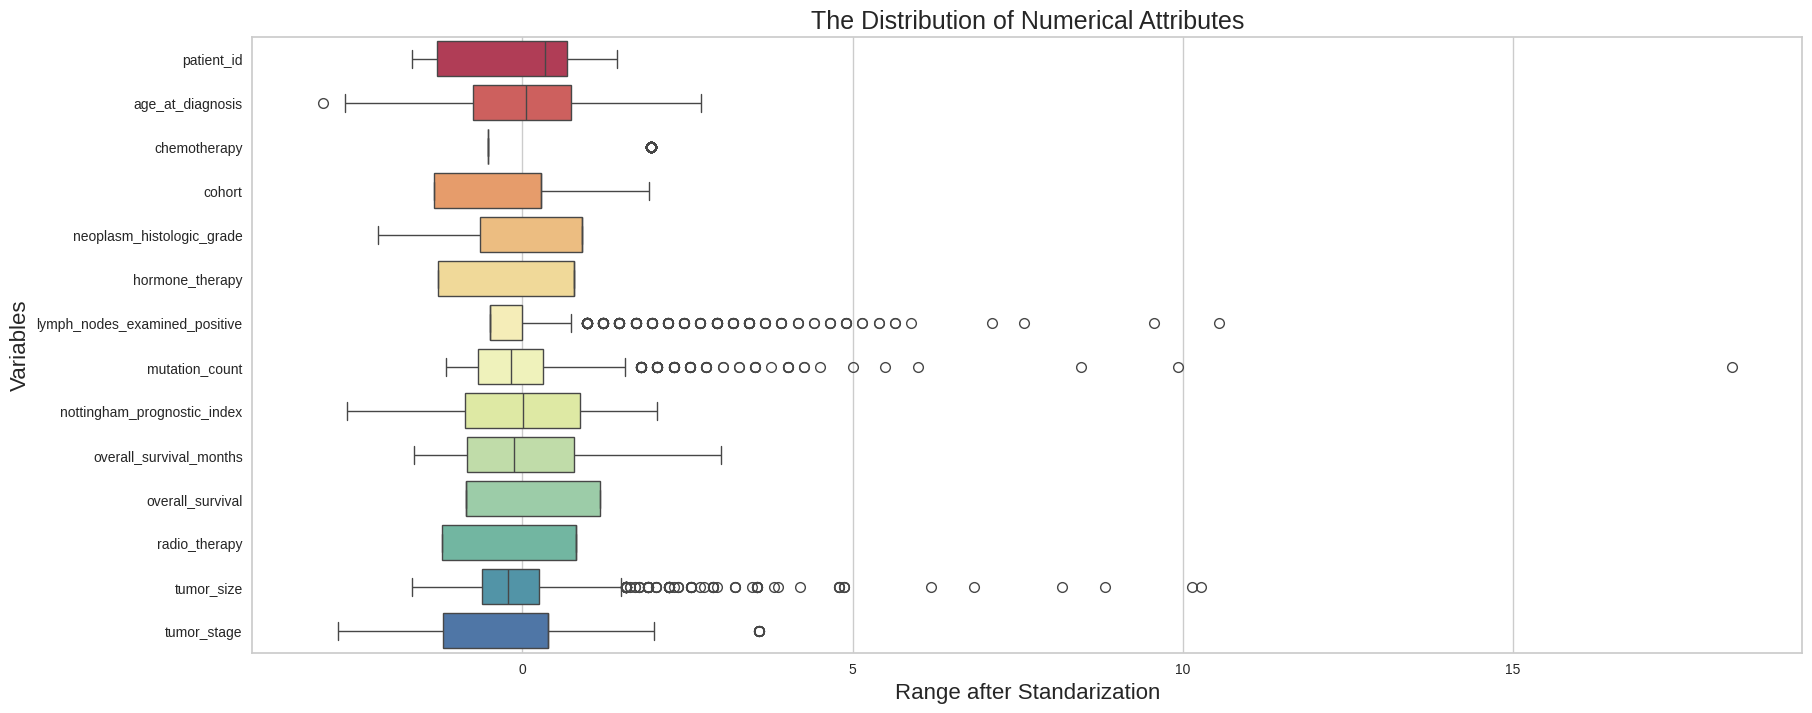

In [168]:
ax, fig = plt.subplots(1, 1, figsize = (20, 8))
plt.title('The Distribution of Numerical Attributes', fontsize = 18) 

sns.boxplot(y = "variable", x = "value", data = pd.melt(to_standard(breast2)), palette = 'Spectral')
plt.xlabel('Range after Standarization', size = 16)
plt.ylabel('Variables', size = 16)


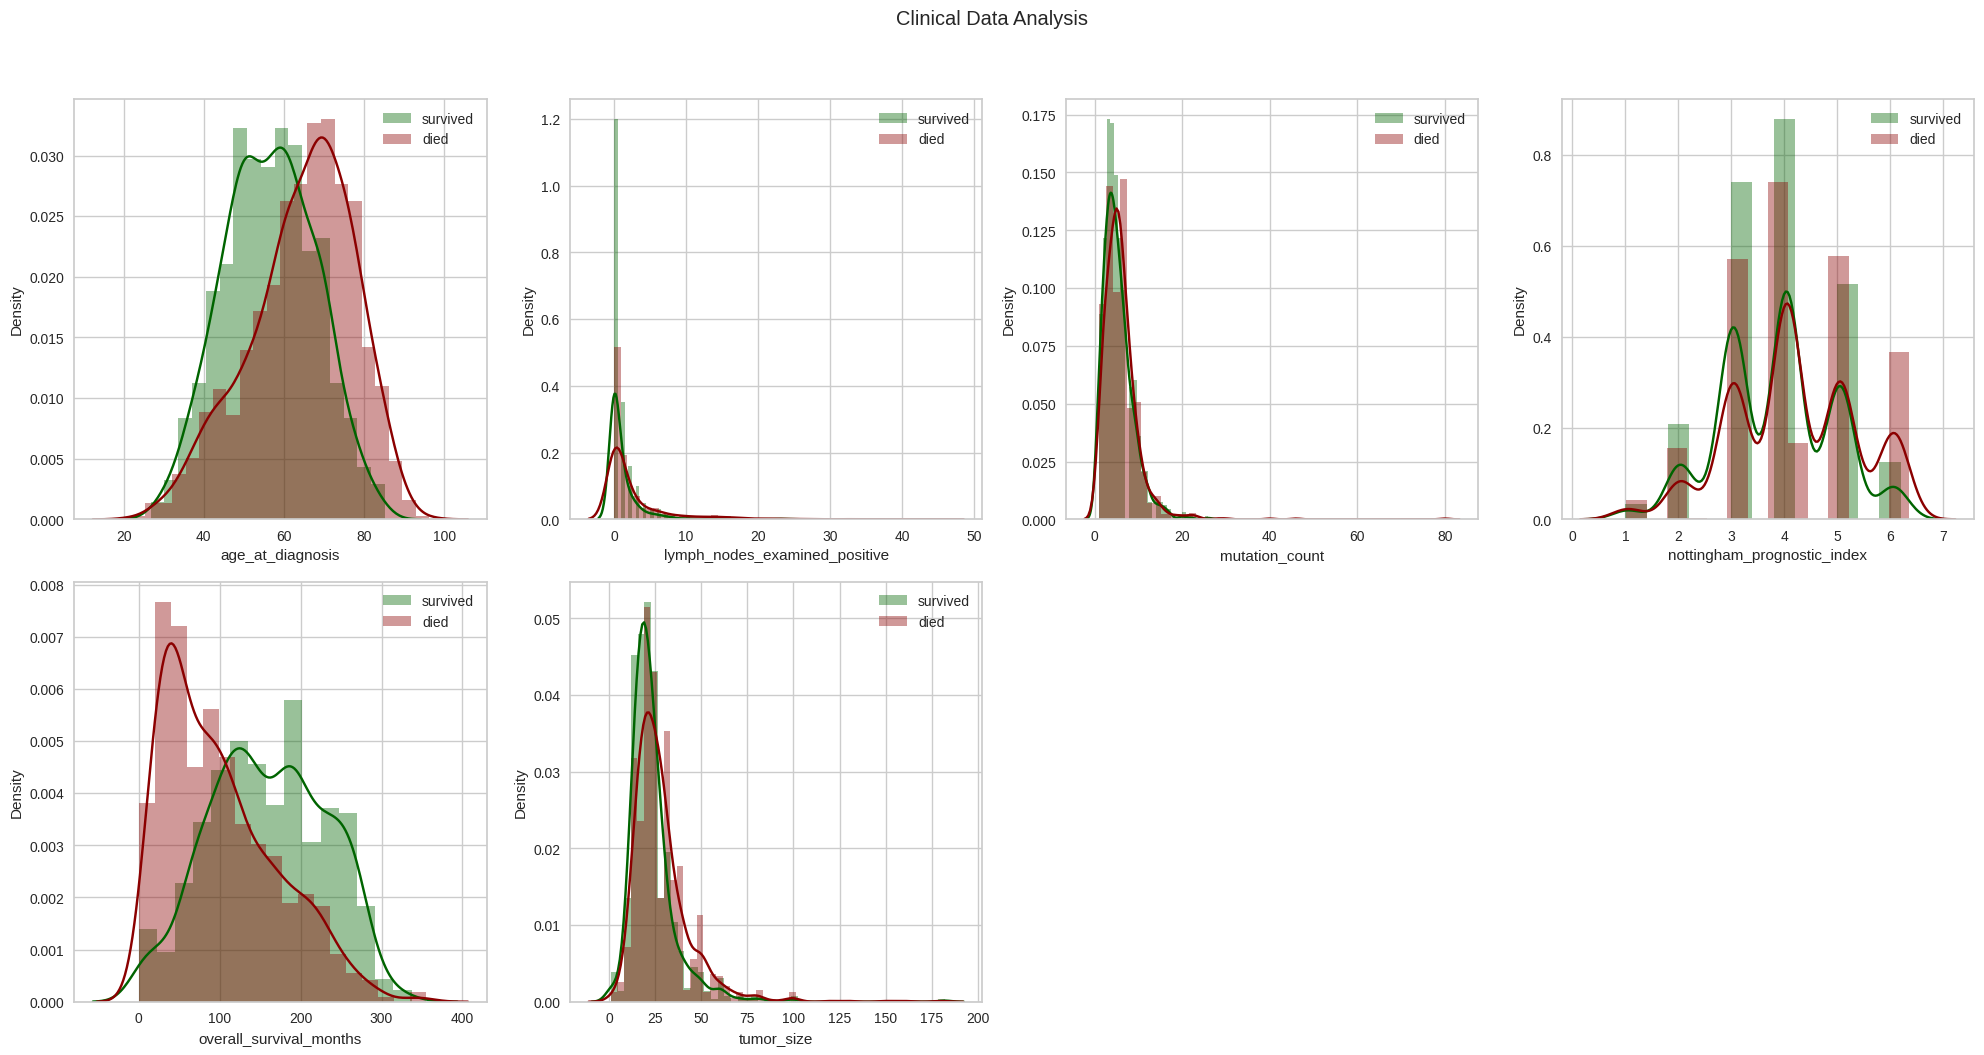

In [169]:
fig = plt.figure(figsize = (20, 30))
j = 0
num_cols = ['age_at_diagnosis', 'lymph_nodes_examined_positive','mutation_count', 'nottingham_prognostic_index', 'overall_survival_months', 'tumor_size' ]
for i in breast[num_cols].columns:
    plt.subplot(6, 4, j+1)
    j += 1
    sns.distplot(breast2[i][breast2['overall_survival']==1], color='darkgreen', label = 'survived')
    sns.distplot(breast2[i][breast2['overall_survival']==0], color='darkred', label = 'died')
    plt.legend(loc='best')
fig.suptitle('Clinical Data Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()


Age at diagonosis

    The patients who survived have bimodal distribution
    The patients who died have left skewed distribution

Lymph nodes examined positive : both the patients who survived and died have right skewed distribution

Mutation count : both the patients who survived and died have right skewed distribution

Nottingham prognostic index : both the patients who survived and died have multimodal distribution

Overall survival months

    The patients who survived have bimodal distribution
    The patients who died have right skewed distribution

Tumor size : both the patients who survived and died have right skewed distribution

In [170]:
died = breast2[breast2['overall_survival']==0]
survived = breast2[breast2['overall_survival']==1]

alive_from_cancer = breast2[breast2['death_from_cancer']=='Living']
died_from_cancer = breast2[breast2['death_from_cancer']=='Died of Disease']
died_not_cancer = breast2[breast2['death_from_cancer']=='Died of Other Causes']

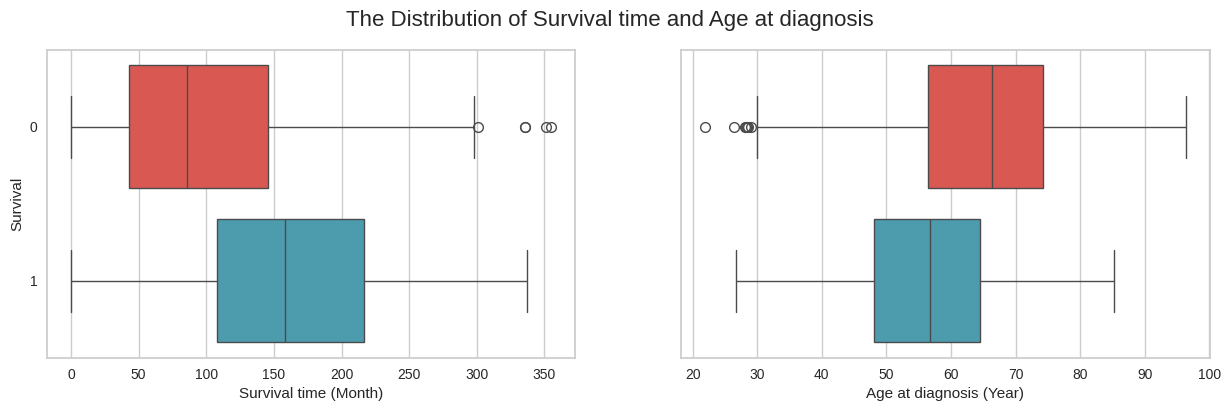

In [171]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,4), sharey=True)

sns.boxplot(x='overall_survival_months', y='overall_survival', orient='h', data=breast2, ax=ax[0], palette = two_colors, saturation=0.90)
sns.boxplot(x='age_at_diagnosis', y='overall_survival', orient='h', data=breast2, ax=ax[1], palette = two_colors, saturation=0.90)

fig.suptitle('The Distribution of Survival time and Age at diagnosis', fontsize = 16)

ax[0].set_xlabel('Survival time (Month)')
ax[0].set_ylabel('Survival')
ax[1].set_xlabel('Age at diagnosis (Year)')
ax[1].set_ylabel('')

plt.show()



Based on the boxplots above, we can see that :

    The difference between the two distributions in age_at_diagnosis column, as patients who were older when diagnosed with breast cancer were more likely to not survive.
    The duration from the time of the intervention to death or to current time is longer in the patients who survive. That means that patients are either dying early from breast cancer or surviving.



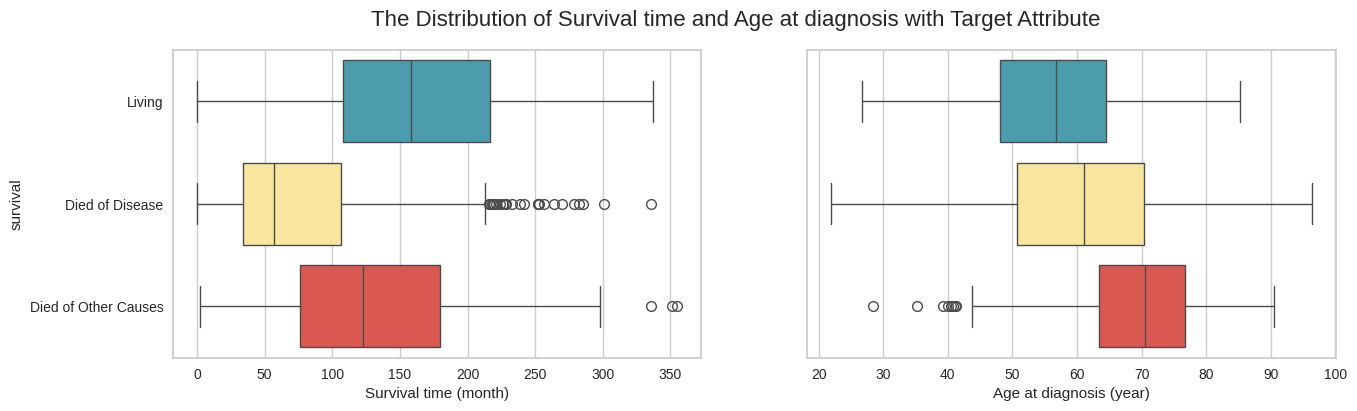

In [172]:
fig, ax = plt.subplots(ncols=2, figsize=(15,4), sharey=True)

sns.boxplot(x='overall_survival_months', y='death_from_cancer', orient='h', data=breast2, ax=ax[0], palette = three_colors, saturation=0.90)
sns.boxplot(x='age_at_diagnosis', y='death_from_cancer', orient='h', data=breast2, ax=ax[1], palette = three_colors, saturation=0.90)

fig.suptitle('The Distribution of Survival time and Age at diagnosis with Target Attribute', fontsize = 16)

ax[0].set_xlabel('Survival time (month)')
ax[0].set_ylabel('survival')
ax[1].set_xlabel('Age at diagnosis (year)')
ax[1].set_ylabel('')

plt.show()



Based on the boxplots above, we can see that :

    Patients who survived from breast are more likely to survive longer compared to patients who died because of breast cancer and person who died because of other disease. Patients with breast cancer are more likely to die faster than a person who died because of other disease.
    Patients whose age at diagnosis > 60 are more likely to die because of other disease. Patients who were younger tend to die because of breast cancer or survive from breast cancer



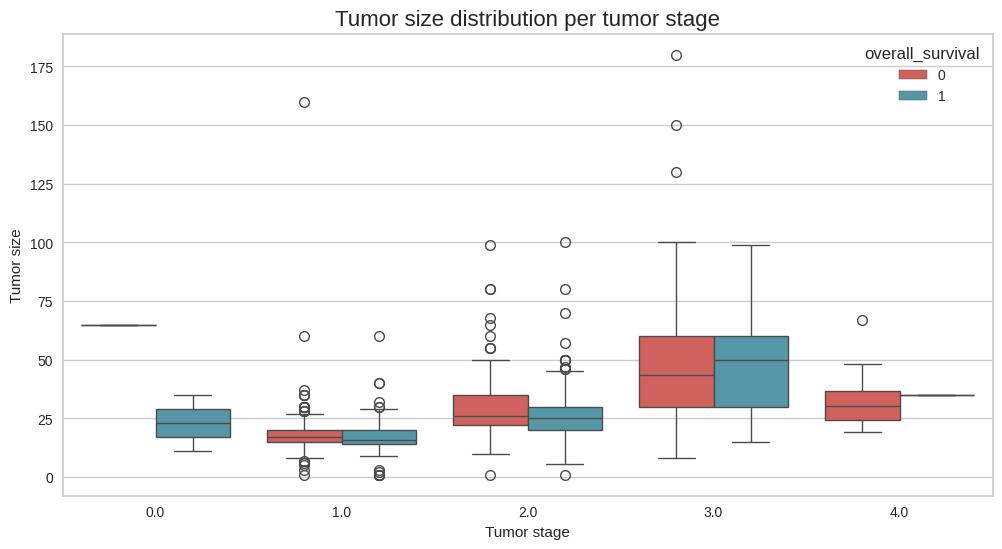

In [173]:
fig, ax = plt.subplots( figsize=(12, 6))
ax = sns.boxplot(x ='tumor_stage', y ='tumor_size',  data = breast2, orient='v', hue='overall_survival', palette=two_colors)
ax.set_ylabel('Tumor size')
ax.set_xlabel('Tumor stage')
plt.title('Tumor size distribution per tumor stage', fontsize=16)
plt.show()



Stage 0.0

    Patients who died have same tumor size, around 60-70
    Patients who survived have tumor size between 15-35

Stage 1.0 Patients who died and survived has relatively same tumor size distribution, except 1 died patients whose tumor size > 150

Stage 2.0 Patients who died and survived has a little bit difference in tumor size distribution and has almost the same median

Stage 3.0

    Patients who died have variety of tumor size, from around 10 to more than 175
    Patients who survived have tumor size between around 20 and 100

Stage 4.0

    Patients who died have tumor size between 20-70
    Patients who survived have same tumor size, around 60-70



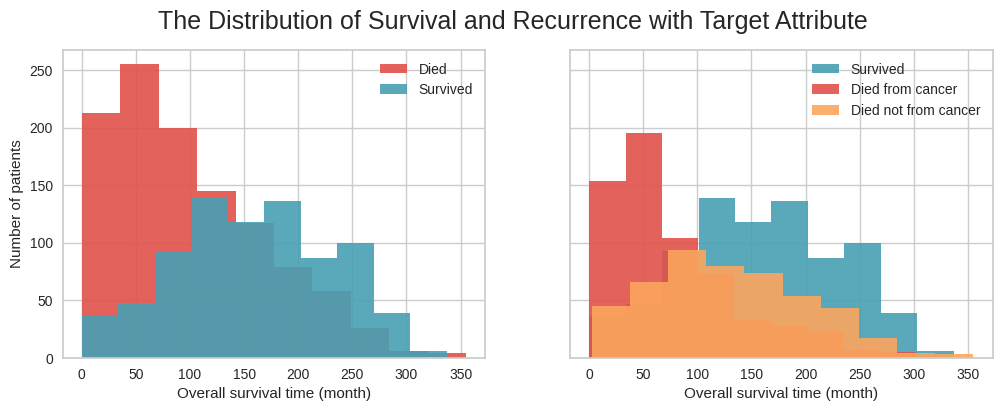

In [174]:
fig, ax = plt.subplots(ncols=2, figsize=(12,4), sharey=True)

fig.suptitle('The Distribution of Survival and Recurrence with Target Attribute', fontsize = 18)

ax[0].hist(died['overall_survival_months'], alpha=0.9, color=sns.color_palette(color)[0], label='Died')
ax[0].hist(survived['overall_survival_months'], alpha=0.9, color=sns.color_palette(color)[5], label='Survived')
ax[0].legend()

ax[1].hist(alive_from_cancer['overall_survival_months'], alpha=0.9, color=sns.color_palette(color)[5], label='Survived')
ax[1].hist(died_from_cancer['overall_survival_months'], alpha=0.9, color=sns.color_palette(color)[0], label='Died from cancer')
ax[1].hist(died_not_cancer['overall_survival_months'], alpha=0.9, color=sns.color_palette(color)[1], label='Died not from cancer')
ax[1].legend()

ax[0].set_xlabel('Overall survival time (month)')
ax[0].set_ylabel('Number of patients')
ax[1].set_xlabel('Overall survival time (month)')
ax[1].set_ylabel('')

plt.show()



From the plots above we know that :

    The higher survival time, the higher number of patients who survived
    The higher survival time, the less number of patients who died not from cancer



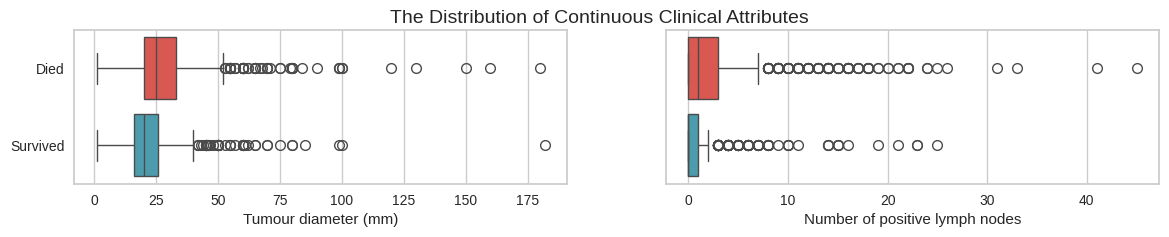

In [175]:
df2 = breast2

fig, ax = plt.subplots(ncols=2, figsize=(14,2), sharey=True)

sns.boxplot(x='tumor_size', y='overall_survival', orient='h', data=df2, ax=ax[0], palette = two_colors, saturation=0.90)
sns.boxplot(x='lymph_nodes_examined_positive', y='overall_survival', orient='h', data=df2, ax=ax[1], palette = two_colors, saturation=0.90)

fig.suptitle('The Distribution of Continuous Clinical Attributes', fontsize = 14)
plt.yticks([-0.5, 0, 1, 1.5], ['','Died', 'Survived',''])

ax[0].set_xlabel('Tumour diameter (mm)')
ax[0].set_ylabel('')

ax[1].set_xlabel('Number of positive lymph nodes')
ax[1].set_ylabel('')

plt.show()





From the plots above, we know that :

    The tumour diameter for patients who died and survived has same minimum and almost the same maximum. THere are many outliers in both distributions
    The minimum number of positive lymph nodes for patient who survived same as the median.
    The minimum number of positive lymph nodes for patient who died same as the Q1
    The distribution of number of positive lymph nodes for died patients is wider than survived patiens



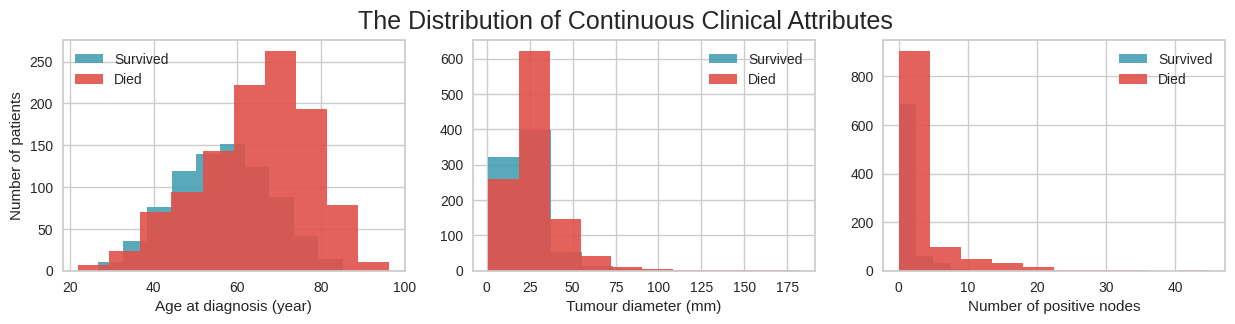

In [176]:
fig, ax = plt.subplots(ncols=3, figsize=(15,3))
fig.suptitle('The Distribution of Continuous Clinical Attributes', fontsize = 18)

ax[0].hist(survived['age_at_diagnosis'], alpha=0.9, color=sns.color_palette(color)[5], label='Survived')
ax[0].hist(died['age_at_diagnosis'], alpha=0.9, color=sns.color_palette(color)[0], label='Died')
ax[0].legend()

ax[1].hist(survived['tumor_size'], alpha=0.9, color=sns.color_palette(color)[5], label='Survived')
ax[1].hist(died['tumor_size'], alpha=0.9, color=sns.color_palette(color)[0], label='Died')
ax[1].legend()

ax[2].hist(survived['lymph_nodes_examined_positive'], alpha=0.9, color=sns.color_palette(color)[5], label='Survived')
ax[2].hist(died['lymph_nodes_examined_positive'], alpha=0.9, color=sns.color_palette(color)[0], label='Died')
ax[2].legend()

ax[0].set_xlabel('Age at diagnosis (year)')
ax[0].set_ylabel('Number of patients')
ax[1].set_xlabel('Tumour diameter (mm)')
ax[1].set_ylabel('')
ax[2].set_xlabel('Number of positive nodes')
ax[2].set_ylabel('')

plt.show()




    The median of tumor size and the number of positive lymph nodes is lower in the survived class than the died class.
    The number of patients for age at diagnosis of died class is hihger than survived class



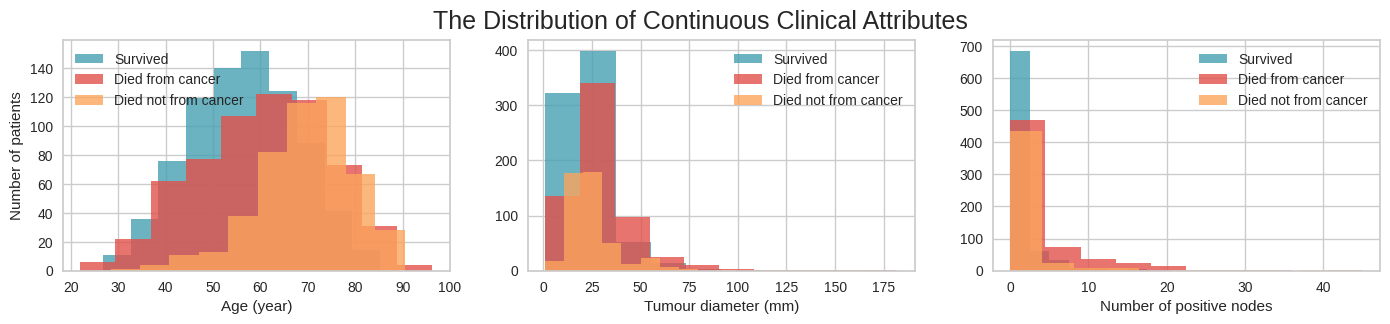

In [177]:
fig, ax = plt.subplots(ncols=3, figsize=(17,3))
fig.suptitle('The Distribution of Continuous Clinical Attributes', fontsize = 18)

ax[0].hist(alive_from_cancer['age_at_diagnosis'], alpha=0.8, color=sns.color_palette(color)[5], label='Survived')
ax[0].hist(died_from_cancer['age_at_diagnosis'], alpha=0.8, color=sns.color_palette(color)[0], label='Died from cancer')
ax[0].hist(died_not_cancer['age_at_diagnosis'], alpha=0.8, color=sns.color_palette(color)[1], label='Died not from cancer')
ax[0].legend()

ax[1].hist(alive_from_cancer['tumor_size'], alpha=0.8, color=sns.color_palette(color)[5], label='Survived')
ax[1].hist(died_from_cancer['tumor_size'], alpha=0.8, color=sns.color_palette(color)[0], label='Died from cancer')
ax[1].hist(died_not_cancer['tumor_size'], alpha=0.8, color=sns.color_palette(color)[1], label='Died not from cancer')
ax[1].legend()

ax[2].hist(survived['lymph_nodes_examined_positive'], alpha=0.8, color=sns.color_palette(color)[5], label='Survived')
ax[2].hist(died_from_cancer['lymph_nodes_examined_positive'], alpha=0.8, color=sns.color_palette(color)[0], label='Died from cancer')
ax[2].hist(died_not_cancer['lymph_nodes_examined_positive'], alpha=0.8, color=sns.color_palette(color)[1], label='Died not from cancer')
ax[2].legend()

ax[0].set_xlabel('Age (year)')
ax[0].set_ylabel('Number of patients')
ax[1].set_xlabel('Tumour diameter (mm)')
ax[1].set_ylabel('')
ax[2].set_xlabel('Number of positive nodes')
ax[2].set_ylabel('')

plt.show()

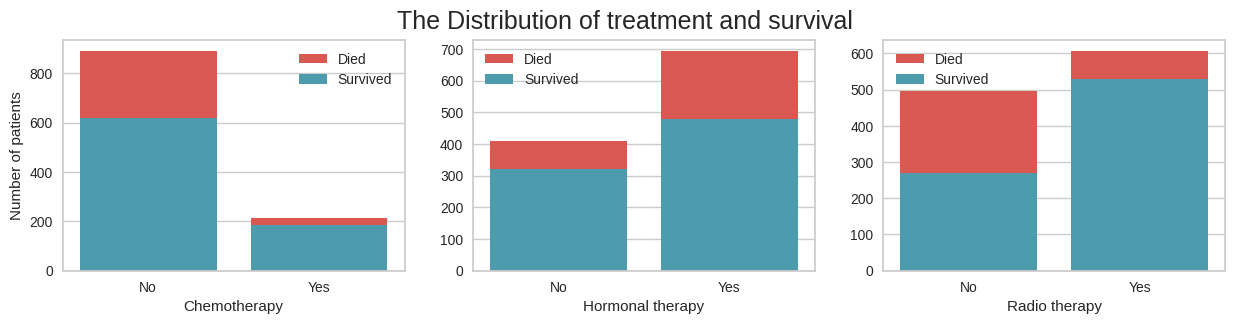

In [183]:
fig, ax = plt.subplots(ncols=3, figsize=(15,3))
fig.suptitle('The Distribution of treatment and survival', fontsize = 18)

sns.countplot(x=died['chemotherapy'] , color=sns.color_palette(color)[0], label='Died', ax=ax[0], saturation=0.90)
sns.countplot(x=survived['chemotherapy'] , color=sns.color_palette(color)[5], label='Survived', ax=ax[0], saturation=0.90)

ax[0].legend()
ax[0].set(xticklabels=['No','Yes'])

sns.countplot(x=died['hormone_therapy'], color=sns.color_palette(color)[0], label='Died', ax=ax[1], saturation=0.90)
sns.countplot(x=survived['hormone_therapy'], color=sns.color_palette(color)[5], label='Survived', ax=ax[1], saturation=0.90)

ax[1].legend()
ax[1].set(xticklabels=['No','Yes'])

sns.countplot(x=died['radio_therapy'], color=sns.color_palette(color)[0], label='Died', ax=ax[2], saturation=0.90)
sns.countplot(x=survived['radio_therapy'], color=sns.color_palette(color)[5], label='Survived', ax=ax[2], saturation=0.90)

ax[2].legend()
ax[2].set(xticklabels=['No','Yes'])

ax[0].set_xlabel('Chemotherapy')
ax[0].set_ylabel('Number of patients')
ax[1].set_xlabel('Hormonal therapy')
ax[1].set_ylabel('')
ax[2].set_xlabel('Radio therapy')
ax[2].set_ylabel('')

plt.show()



Chemotherapy treatment

    The difference between died class and survived class is large for patient with chemotherapy compared to patients without chemotherapy
    Patients in died class without chemotherapy is very high, more than 800. Meanwhile, patients in died class with chemotherapy is not so high, a little over 200

Hormonal therapy

    The difference between died class and survived class is quite large for patient with hormonal therapy compared to patients without hormonal therapy
    Patients in died class with chemotherapy is quite high, a little bit under 700. Patients in died class with chemotherapy is not so high, a little over 400

Radio therapy

    The difference between died class and survived class is quite large for patient with radio therapy compared to patients without radio therapy
    Number of patients in died class both with radio therapy and without radio therapy is the highest compared to other therapy method



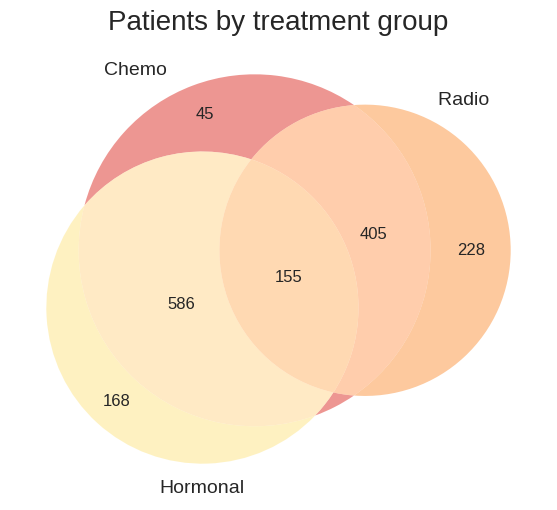

In [184]:
chemo = df2[(df2["chemotherapy"]==True) & (df2["radio_therapy"]==False) & (df2["hormone_therapy"]==False)]
radio = df2[(df2["chemotherapy"]==False) & (df2["radio_therapy"]==True) & (df2["hormone_therapy"]==False)]
hormonal = df2[(df2["chemotherapy"]==False) & (df2["radio_therapy"]==False) & (df2["hormone_therapy"]==True)]
chemo_radio = df2[(df2["chemotherapy"]==True) & (df2["radio_therapy"]==True) & (df2["hormone_therapy"]==False)]
radio_hormonal = df2[(df2["chemotherapy"]==False) & (df2["radio_therapy"]==True) & (df2["hormone_therapy"]==True)]
hormonal_chemo = df2[(df2["chemotherapy"]==True) & (df2["radio_therapy"]==False) & (df2["hormone_therapy"]==True)]
all_3 = df2[(df2["chemotherapy"]==True) & (df2["radio_therapy"]==True) & (df2["hormone_therapy"]==True)]

#calculate number of people for each combination and proportion death
df_subsets = [chemo, radio, hormonal, chemo_radio, radio_hormonal, hormonal_chemo, all_3]
sizes=[]
proportiondeath=[]
for dataframe in df_subsets:
    sizes.append(np.shape(dataframe)[0])
    proportiondeath.append(np.mean(dataframe["overall_survival"]))

#set size of circles relative to size of each subset (where possible)
#set gradient of blue according to proportion of death in subset calculated above
fig, ax = plt.subplots(figsize=(8,6))
v = venn3(subsets=sizes, set_labels=("Chemo", "Radio ", "Hormonal"), ax=ax, alpha=0.6, set_colors= sns.color_palette(color))

for text in v.set_labels:
    text.set_fontsize(14)
    
ax.set_title("Patients by treatment group", size=20)
plt.show()



    Most of patients get combination of chemotherapy and hormonal therapy treatment, followed by radio therapy and chemotherapy
    Radio therapy is the most often given to the patients in terms of sole treatment
    There are no patients who were given the combination of radio therapy and hormonal therapy



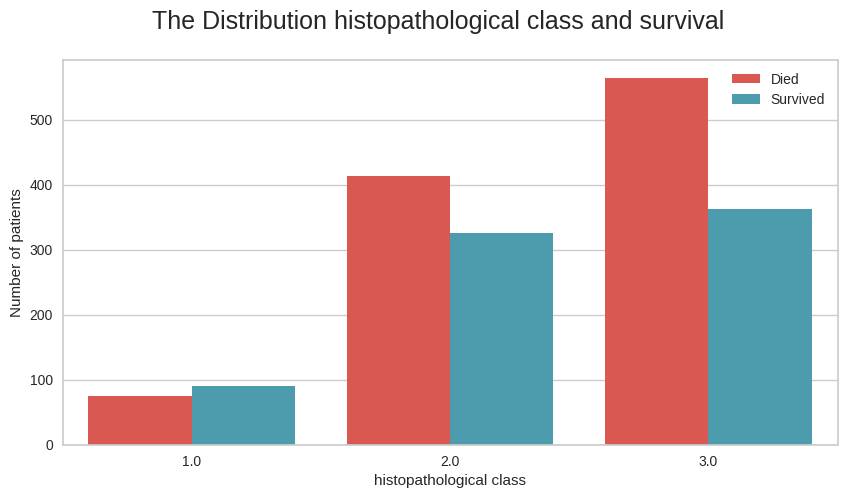

In [185]:
fig, ax = plt.subplots( figsize=(10,5))
fig.suptitle('The Distribution histopathological class and survival', fontsize = 18)

sns.countplot(x='neoplasm_histologic_grade', hue='overall_survival' ,data = df2, palette=two_colors , ax=ax, saturation=0.90)
ax.legend([ 'Died', 'Survived'])

ax.set_xlabel('histopathological class')
ax.set_ylabel('Number of patients')

plt.show()



    The patient in died class is always higher than in survived class except for class 1.0
    The difference of number of patients both died and survived class for class 1.0 is high compared to other class



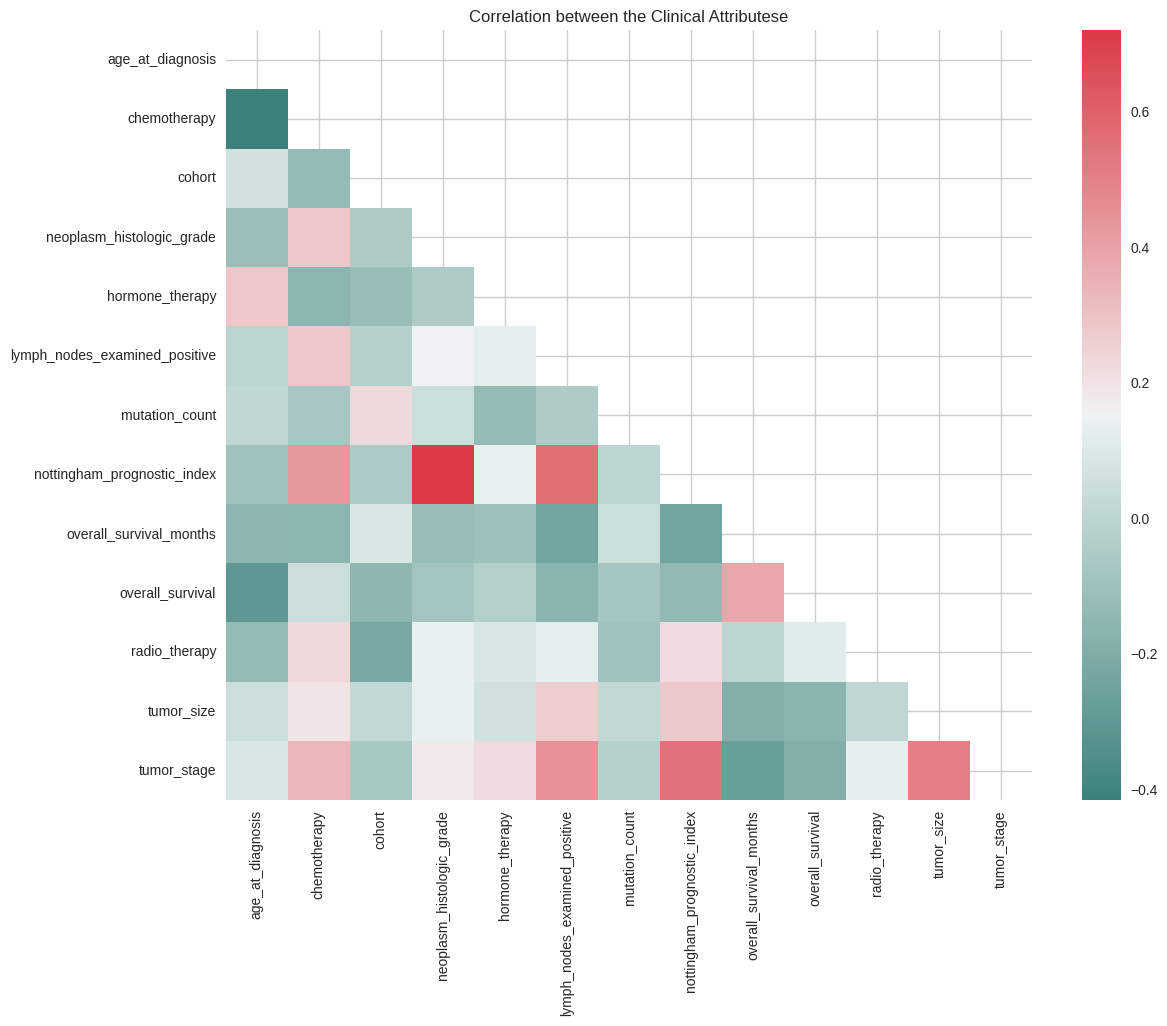

In [188]:
fig, axs = plt.subplots(figsize = (13, 10)) 
categorical_columns = df2.select_dtypes(include=['object']).columns.tolist()
unwanted_columns = ['patient_id','death_from_cancer' ]
categorical_columns = [ele for ele in categorical_columns if ele not in unwanted_columns] 
no_id_df = pd.get_dummies(df2.drop('patient_id',axis=1 ), columns= categorical_columns)
#no_id_clinical_df= clinical_df.drop('ID',axis=1 )

no_id_df = no_id_df.select_dtypes(include=np.number)

mask = np.triu(np.ones_like(no_id_df.corr(), dtype = bool))
sns.heatmap(no_id_df.corr(), ax = axs, mask = mask, cmap = sns.diverging_palette(180, 10, as_cmap = True))
plt.title('Correlation between the Clinical Attributese')

plt.show()

In [189]:
survival_corr = no_id_df.corr()['overall_survival'].sort_values(ascending = False)
survival_corr_df = pd.DataFrame({'Correlation': survival_corr})
survival_corr_df.head(10)

,Correlation
overall_survival,1.000000
overall_survival_months,0.384467
radio_therapy,0.112083
chemotherapy,0.045625
hormone_therapy,-0.030401
mutation_count,-0.077741
neoplasm_histologic_grade,-0.086601
nottingham_prognostic_index,-0.138000
cohort,-0.149645
tumor_size,-0.164361


In [190]:
survival_corr_df.tail()

,Correlation
cohort,-0.149645
tumor_size,-0.164361
lymph_nodes_examined_positive,-0.164498
tumor_stage,-0.188790
age_at_diagnosis,-0.303666


In [191]:
# Statistical summaries of numeric attributes
num_attributes_columns= ['age_at_diagnosis', 'lymph_nodes_examined_positive','mutation_count',
                       'nottingham_prognostic_index', 'overall_survival_months', 'tumor_size' ]
cat_attributes_columns = ['chemotherapy', 'cohort', 'neoplasm_histologic_grade','hormone_therapy', 
                        'overall_survival', 'radio_therapy', 'tumor_stage' ]
# Statistical summary for numerical clinical attributes 
df2[num_attributes_columns].describe().T 

,count,mean,std,min,25%,50%,75%,max
age_at_diagnosis,1904.0,61.087054,12.978711,21.93,51.375,61.770000,70.592500,96.29
lymph_nodes_examined_positive,1904.0,2.002101,4.079993,0.00,0.000,0.000000,2.000000,45.00
mutation_count,1859.0,5.697687,4.058778,1.00,3.000,5.000000,7.000000,80.00
nottingham_prognostic_index,1904.0,4.033019,1.144492,1.00,3.046,4.042000,5.040250,6.36
overall_survival_months,1904.0,125.121324,76.334148,0.00,60.825,115.616667,184.716667,355.20
tumor_size,1884.0,26.238726,15.160976,1.00,17.000,23.000000,30.000000,182.00


In [192]:
cat_attributes_columns.extend(df2.select_dtypes(include=['object']).columns.tolist())
df2[cat_attributes_columns].astype('category').describe().T


,count,unique,top,freq
chemotherapy,1904,2,0,1508
cohort,1904.0,5.0,3.0,734.0
neoplasm_histologic_grade,1832.0,3.0,3.0,927.0
hormone_therapy,1904,2,1,1174
overall_survival,1904,2,0,1103
radio_therapy,1904,2,1,1137
tumor_stage,1403.0,5.0,2.0,800.0
type_of_breast_surgery,1882,2,MASTECTOMY,1127
cancer_type,1904,2,Breast Cancer,1903
cancer_type_detailed,1889,6,Breast Invasive Ductal Carcinoma,1500


In [195]:
# statistics for the no treatment group and comparison with the baseline
df = breast
no_treatment = df2[(df2['chemotherapy']==0) & (df2['hormone_therapy']==0) & (df2['radio_therapy']==0)]
print("Number of patients who had no treatment: " , no_treatment.shape[0])
print("Proportion of survival with no treatment: " , ("%.3f" %np.mean(no_treatment["overall_survival"])))
print("Baseline proportion of survival in all groups: ", ("%.3f" %np.mean(df["overall_survival"])))

Number of patients who had no treatment:  289
Proportion of survival with no treatment:  0.381
Baseline proportion of survival in all groups:  0.421


In [199]:
#What the average patient looks like
print("Mean of age : " + "%.3f" %np.mean(df2['age_at_diagnosis']))
# print("Most occurring tumour stage :", stats.mode(df2['tumor_stage'])[0][0].astype(int))
# print("Most occurring histopathological type :", stats.mode(df2['neoplasm_histologic_grade'])[0][0].astype(int))
print("Mean of tumour diameter : " + "%.3f" %np.mean(df2['tumor_size']))
print("Probability of survival : "+ "%.3f" %(df2["overall_survival"].value_counts()/df2["overall_survival"].count()).iloc[1])

Mean of age : 61.087
Mean of tumour diameter : 26.239
Probability of survival : 0.421


In [211]:
print("Most occurring tumour stage :", stats.mode(df2['tumor_stage'])[0])
print("Most occurring histopathological type :", stats.mode(df2['neoplasm_histologic_grade'])[0])

Most occurring tumour stage : 2.0
Most occurring histopathological type : 3.0


In [218]:
# finding outlier
numeric_columns = df2.select_dtypes(include=['number']).columns
numeric_df = df2[numeric_columns]

Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

outliers = ((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).sum().sort_values(ascending=False)
print (outliers)


chemotherapy                     396
lymph_nodes_examined_positive    210
tumor_size                       142
mutation_count                    62
tumor_stage                        9
age_at_diagnosis                   1
patient_id                         0
cohort                             0
neoplasm_histologic_grade          0
hormone_therapy                    0
nottingham_prognostic_index        0
overall_survival_months            0
overall_survival                   0
radio_therapy                      0
dtype: int64


In [219]:
# Relationship between genetic attributes and outcomes
# dropping mutations
genetic_features_to_drop = df.columns[520:]
df3 = df.drop(genetic_features_to_drop, axis=1)
# droping clinical data
genetic_features_to_drop = df3.columns[4:35]
df3 = df3.drop(genetic_features_to_drop, axis=1)
df3 = df3.drop(['age_at_diagnosis','type_of_breast_surgery', 'cancer_type'], axis=1)
df3 = df3.iloc [:,:-174]
df3['overall_survival']= df['overall_survival']

df3.head()

,patient_id,tp53,atm,cdh1,chek2,nbn,nf1,stk11,bard1,mlh1,...,tubb4a,tubb4b,twist1,adgra2,afdn,aff2,agmo,agtr2,ahnak,overall_survival
0,0,0.3504,1.1517,0.0348,0.1266,-0.8361,-0.8578,-0.4294,-1.1201,-0.4844,...,-0.0250,-0.4113,2.8096,2.8014,-0.0004,0.9673,0.3011,-0.8436,1.8227,1
1,2,-0.0136,-0.2659,1.3594,0.7961,0.5419,-2.6059,0.5120,0.4390,1.2266,...,-0.1003,0.7791,-0.2273,-0.4462,-1.9854,0.5022,-0.9526,-1.8435,1.6662,1
2,5,0.5141,-0.0803,1.1398,0.4187,-0.4030,-1.1305,0.2362,-0.1721,-1.7910,...,1.2084,-0.6572,0.1984,-1.0721,-0.9729,0.0515,0.1109,0.9874,-0.0154,0
3,6,1.6708,-0.8880,1.2491,-1.1889,-0.4174,-0.6165,1.0078,-0.4010,-1.3905,...,0.3142,-0.4413,0.1932,-1.0215,0.4553,-0.2354,0.4003,1.4839,0.3101,1
4,8,0.3484,0.3897,0.9131,0.9356,0.7675,-0.2940,-0.2961,0.6320,-0.3582,...,-0.6606,-1.4697,0.4128,-1.5326,-0.4795,1.0052,0.9739,0.8825,-0.7598,0


In [220]:
#Finding maximum and std in each column, std is always 1 because the datapoints are z-scores
max_values = df3.iloc[:, 1:].max()
std = df3.iloc[:, 1:].std(axis = 0, skipna = True)
max_data = pd.concat([max_values, std], axis = 1, keys = ['max_values', 'std']).sort_values(by='max_values', ascending = False).head()
max_data

,max_values,std
tubb4a,18.6351,1.000263
hes5,17.1431,1.000262
itgb3,15.3308,1.000263
slco1b3,14.8651,1.000262
inha,14.4243,1.000263


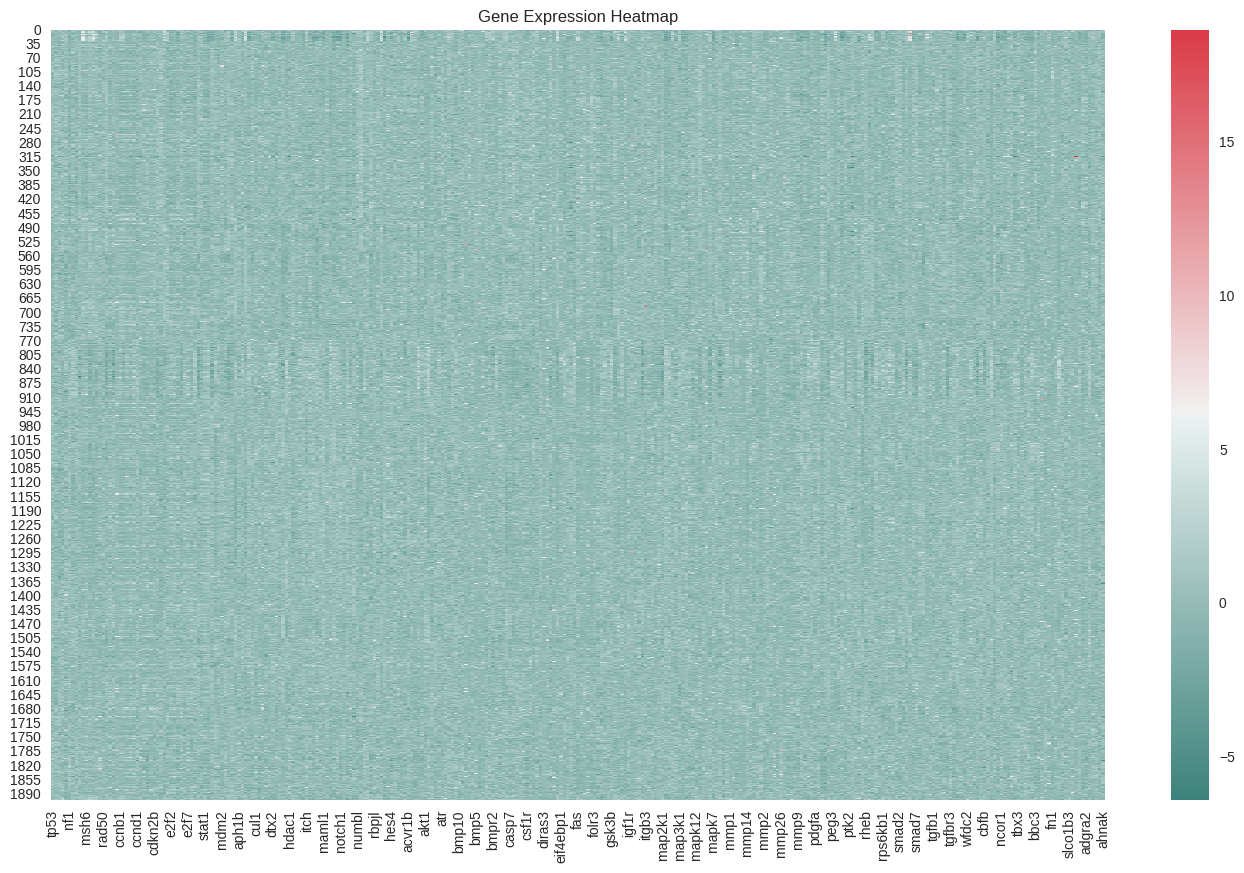

In [221]:
# Visualizing the mRNA values in a heatmap.
fig, axs = plt.subplots(figsize = (17, 10)) 
sns.heatmap(df3.drop(['patient_id','overall_survival'], axis=1), ax = axs, cmap = sns.diverging_palette(180, 10, as_cmap = True))
plt.title('Gene Expression Heatmap')

plt.show()

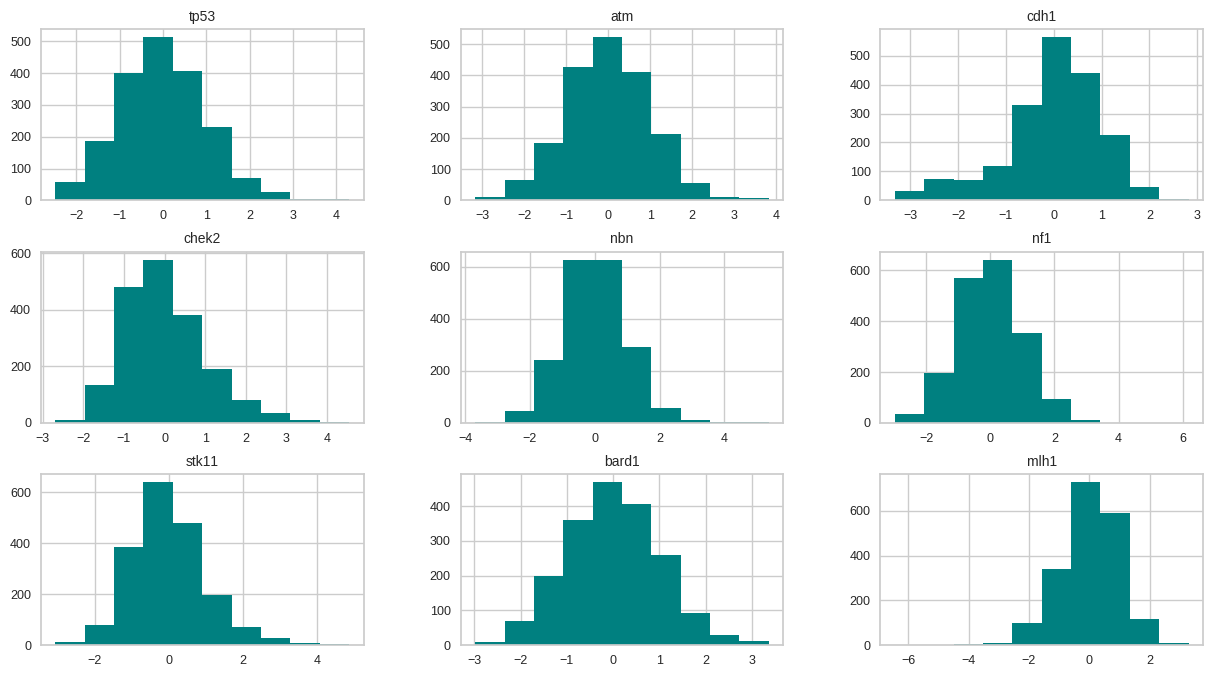

In [222]:
params = {'axes.titlesize':'10',
          'xtick.labelsize':'9',
          'ytick.labelsize':'9'}
matplotlib.rcParams.update(params)
#plt.subplots_adjust(hspace=0.5) 
df3.drop(['patient_id','overall_survival'], axis=1).iloc[:,:9].hist(figsize=(15,8), color=color_hist)
plt.show()

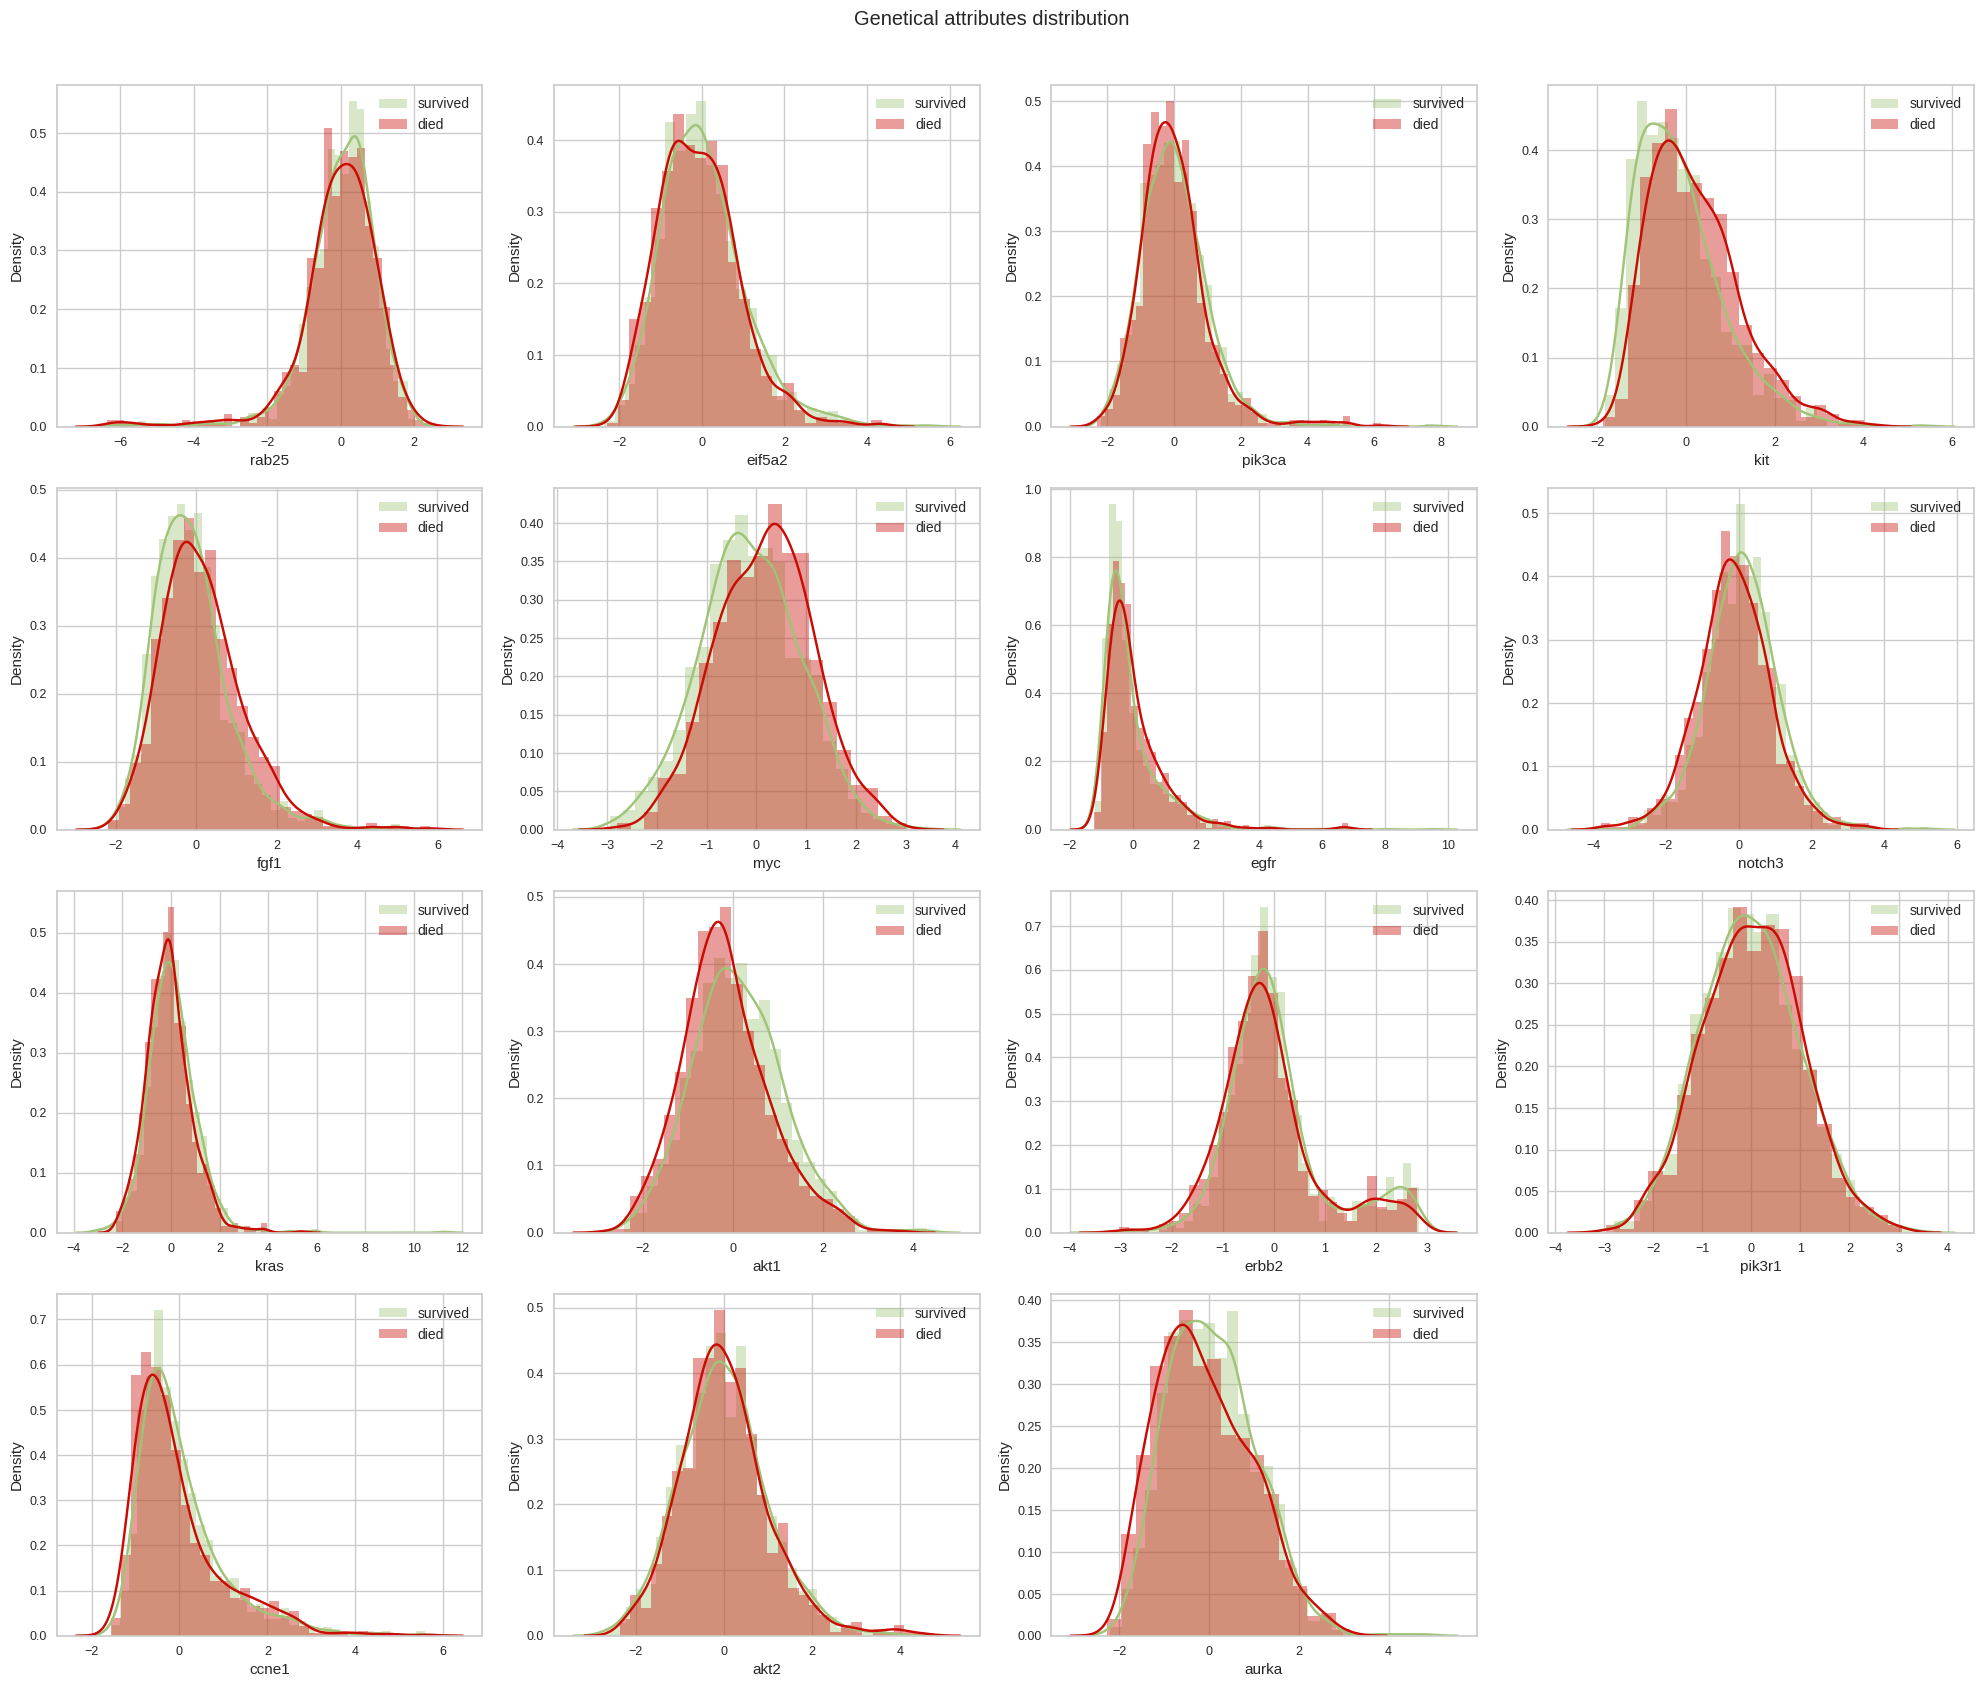

In [223]:
fig = plt.figure(figsize = (20, 25))
j = 0

gene_list = ['rab25', 'eif5a2', 'pik3ca', 'kit', 'fgf1', 'myc', 'egfr', 'notch3', 'kras', 'akt1', 'erbb2', 'pik3r1', 'ccne1', 'akt2', 'aurka']
for i in df3.drop(['patient_id'], axis=1).loc[:,gene_list].columns:
    plt.subplot(6, 4, j+1)
    j += 1
    sns.distplot(df3[i][df3['overall_survival']==0], color='g', label = 'survived')
    sns.distplot(df3[i][df3['overall_survival']==1], color='r', label = 'died')
    plt.legend(loc='best')
fig.suptitle('Genetical attributes distribution')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()


All of the attributes have relatively the same distribution shape for two classes (survival and dead)

In [224]:
print('Maximum value possible in genetic data:', df3.drop(['patient_id','overall_survival'], axis = 1).max().max())
print('Minimum value possible in genetic data:', df3.drop(['patient_id','overall_survival'], axis = 1).min().min())

Maximum value possible in genetic data: 18.6351
Minimum value possible in genetic data: -6.4387


In [226]:
#Finding number of outliers in each column
Q1 = df3.quantile(0.25)
Q3 = df3.quantile(0.75)
IQR = Q3 - Q1
((df3 < (Q1 - 1.5 * IQR)) | (df3 > (Q3 + 1.5 * IQR))).sum().sort_values(ascending = False).head(10)

erbb2     224
dll3      194
mmp1      186
mmp12     180
cdkn2a    179
ccna1     154
bmp7      152
wwox      148
map2      144
folr1     142
dtype: int64

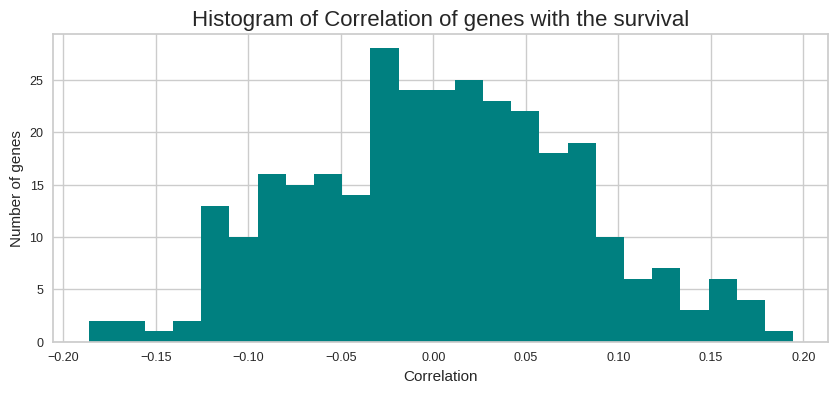

In [227]:
#how varied are genes and how well do they correlate with eventdeath?
fig, ax = plt.subplots(figsize=(10,4))

#plot histogram of variation using standard deviation as a measure
corrs=[]
for col in df3.drop(['patient_id'], axis = 1).columns:
    corr = df3[[col,'overall_survival']].corr()['overall_survival'][col]
    corrs.append(corr)

corrs.pop(-1)
ax.hist(corrs,  bins=25, color = color_hist)
ax.set_xlabel("Correlation")
ax.set_ylabel("Number of genes")
ax.set_title("Histogram of Correlation of genes with the survival", size=16)
plt.show()

In [228]:


#Max, min and mean of correlation
print("Maximum Correlation: " + "%.3f" %max(corrs))
print("Minimum Correlation: " + "%.3f" %min(corrs))
print("Mean Correlation: " + "%.3f" %np.mean(corrs))



Maximum Correlation: 0.194
Minimum Correlation: -0.186
Mean Correlation: 0.004


In [229]:
# droping clinical and genetic data
mutation_features_to_drop = df.columns[4:520]
df4 = df.drop(mutation_features_to_drop, axis=1)
df4 = df4.drop(['age_at_diagnosis','type_of_breast_surgery', 'cancer_type'], axis=1)

# if there is a mutation=1, no-mutation=0
for column in df4.columns[1:]:
    df4[column]=pd.to_numeric(df4[column], errors='coerce').fillna(1).astype(int)

df4.insert(loc=1 , column='overall_survival', value=df['overall_survival'])

df4.head()

,patient_id,overall_survival,pik3ca_mut,tp53_mut,muc16_mut,ahnak2_mut,kmt2c_mut,syne1_mut,gata3_mut,map3k1_mut,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Some genes had much more mutations than other genes. For example: PIK3CA (coding mutations in 40.1% of the samples) and TP53 (35.4%) dominated the mutation landscape. Only five other genes harboured coding mutations in at least 10% of the samples: MUC16 (16.8%); AHNAK2 (16.2%); SYNE1 (12.0%); KMT2C (also known as MLL3; 11.4%) and GATA3 (11.1%).

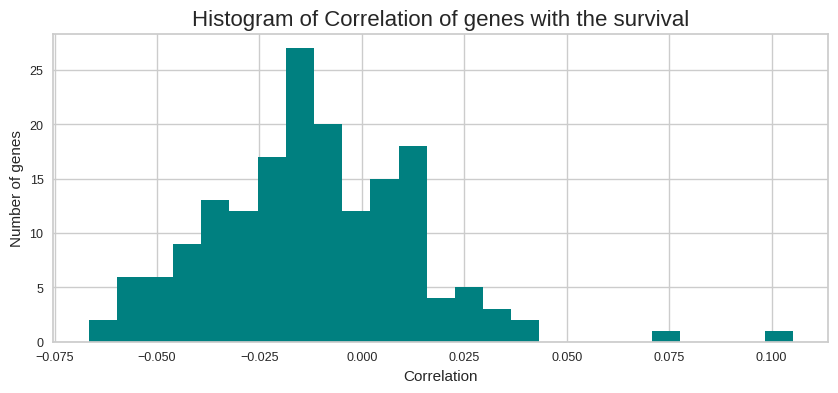

In [230]:
#plot histogram of variation using standard deviation as a measure
fig, ax = plt.subplots(figsize=(10,4))
corrs=[]
for col in df4.drop(['patient_id'], axis = 1).columns:
    corr = df4[[col,'overall_survival']].corr()['overall_survival'][col]
    corrs.append(corr)
    
corrs.pop(0)
ax.hist(corrs,  bins=25, color = color_hist)
ax.set_xlabel("Correlation")
ax.set_ylabel("Number of genes")
ax.set_title("Histogram of Correlation of genes with the survival", size=16)


plt.show()

Most of correlation is between -0.02 and 0.02

In [235]:
# Statistics, EDA, metrics libraries
from scipy.stats import normaltest, skew
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error, accuracy_score, f1_score
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error
from sklearn.metrics import classification_report, confusion_matrix
from scipy.special import boxcox, inv_boxcox

# Modeling libraries
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold, cross_val_predict,  KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.decomposition import PCA
from scipy.stats import zscore
from itertools import combinations
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import IsolationForest
import kmapper as km
from sklearn.cluster import KMeans

In [236]:
BOLD = '\033[1m'
END = '\033[0m'
# using a stratfied k fold because we need the distribution of the to classes in all of the folds to be the same.
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


In [237]:
print('Baseline accuracy:' )
print(df["overall_survival"].value_counts()/df["overall_survival"].count())

Baseline accuracy:
overall_survival
0    0.579307
1    0.420693
Name: count, dtype: float64


In [238]:
# Classification with only clinical attributes
categorical_columns = df2.select_dtypes(include=['object']).columns.tolist()
unwanted_columns = ['patient_id','death_from_cancer' ]
categorical_columns = [ele for ele in categorical_columns if ele not in unwanted_columns] 
# Getting dummies for all categorical columns
dummies_df = pd.get_dummies(df2.drop('patient_id',axis=1 ), columns= categorical_columns, dummy_na=True)
dummies_df.dropna(inplace = True)



In [246]:
# data splitting
X = dummies_df.drop(['death_from_cancer', 'overall_survival'], axis=1)
y = dummies_df['overall_survival']
# using stratify for y because we need the distribution of the two classes to be equal in train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

In [251]:
def model_metrics(model, kfold, X_train, X_test, y_train, y_test):
    
    model.fit(X_train, y_train)

    #metrics
    results = cross_val_score(model, X_train, y_train, cv = kfold)
    print("CV scores: ", results); print("CV Standard Deviation: ", results.std()); print();
    print('CV Mean score: ', results.mean()); 
    print('Train score:   ', model.score(X_train, y_train))
    print('Test score:    ', model.score(X_test, y_test))
    
    pred = model.predict(X_test)
    print("\n")
    print()
    print('Confusion Matrix: ')
    print(confusion_matrix(y_test, pred))
    print('Classification Report:  ')
    print(classification_report(y_test, pred))
    train_score =  model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    test_pred = model.predict(X_test)
    return test_pred, test_score, results.mean()

def basic_classifiers (X_train, X_test, y_train, y_test, kfold):
    BOLD = '\033[1m'
    END = '\033[0m'
    
    # Scaling 
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    ######################################################################################################  K Neighbors Classifier model
    
    params = {
    "n_neighbors" : [5,15,25,30,35,40, 100],
    "weights" : ["uniform" , "distance"]
    }
    print(); print(BOLD + 'K Neighbors Classifier Model:' + END)
    knn= GridSearchCV(KNeighborsClassifier(), params, n_jobs=-1, cv=4)
    knn_pred, knn_test, knn_train = model_metrics(knn, kfold, X_train, X_test, y_train, y_test)
    
    ###################################################################################################### Logistic Regression
    params = {
    "penalty": ["l1", "l2"],
    "C": np.logspace(-2,4,100)
    }
    print(); print(BOLD + 'Logistic Regression Model:' + END)
    logistic_regression = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), params, n_jobs=-1, cv=4)
    lg_pred, lg_test, lg_train = model_metrics(logistic_regression, kfold, X_train, X_test, y_train, y_test)
    
    ###################################################################################################### Decision Tree
    
    print(); print(BOLD + 'Decision Tree Classifier Model:' + END)
    decision_tree = DecisionTreeClassifier(random_state=42)
    dt_pred, dt_test, dt_train = model_metrics(decision_tree, kfold, X_train, X_test, y_train, y_test)
    
    ###################################################################################################### Random Forest Classifier
    
    print(); print(BOLD + 'Random Forest Classifier Model:' + END)
    random_forest = RandomForestClassifier(random_state=42)
    rf_pred, rf_test, rf_train = model_metrics(random_forest, kfold, X_train, X_test, y_train, y_test)
    
    ###################################################################################################### Extra Trees Classifier
   
    print(); print(BOLD + 'Extra Trees Classifier Model:' + END)
    extra_trees = ExtraTreesClassifier(random_state=42)
    et_pred, et_test, et_train = model_metrics(extra_trees, kfold, X_train, X_test, y_train, y_test)
    
    ###################################################################################################### AdaBoost Classifier
    
    print(); print(BOLD + 'AdaBoost Classifier Model:' + END)
    ada_boost = AdaBoostClassifier(random_state=42)
    ab_pred, ab_test, ab_train = model_metrics(ada_boost, kfold, X_train, X_test, y_train, y_test)
    
    ###################################################################################################### SVC Classifier
    
    print(); print(BOLD + 'SVC Classifier Model:' + END)
    svc = SVC(random_state=42)
    svc_pred, svc_test, svc_train = model_metrics(svc, kfold, X_train, X_test, y_train, y_test)

    fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(15,6))

    
    #bar chart of accuracy scores
    inds = range(1,8)
    labels = ["KNN", "Logistic Regression", "Decision Tree", "Random Forest",'Extra Trees', 'AdaBoost', 'SVC' ]
    scores_all = [knn_train, lg_train, dt_train, rf_train, et_train, ab_train, svc_train]
    scores_predictive = [knn_test, lg_test, dt_test, rf_test, et_test, ab_test, svc_test]
    
    ax1.bar(inds, scores_all, color=sns.color_palette(color)[5], alpha=0.3, hatch="x", edgecolor="none",label="CrossValidation Set")
    ax1.bar(inds, scores_predictive, color=sns.color_palette(color)[0], label="Testing set")
    ax1.set_ylim(0.4, 1)
    ax1.set_ylabel("Accuracy score")
    ax1.axhline(0.5793, color="black", linestyle="--")
    ax1.set_title("Accuracy scores for basic models", fontsize=17)
    ax1.set_xticks(range(1,8))
    ax1.set_xticklabels(labels, size=12, rotation=40, ha="right")
    ax1.legend()

    labels = ["KNN", "Logistic Regression", "Decision Tree", "Random Forest",'Extra Trees', 'AdaBoost', 'SVC' ]
    for label, pred in zip(labels, [knn_pred, lg_pred, dt_pred, rf_pred, et_pred, ab_pred, svc_pred]):
        fpr, tpr, threshold = roc_curve(y_test.values, pred)
        roc_auc = auc(fpr, tpr)
        ax2.plot(fpr, tpr, label=label+' (area = %0.2f)' % roc_auc, linewidth=2)
    ax2.plot([0, 1], [0, 1], 'k--', linewidth=2)
    ax2.set_xlim([-0.05, 1.0])
    ax2.set_ylim([-0.05, 1.05])
    ax2.set_xlabel('False Positive Rate')
    ax2.set_ylabel('True Positive Rate')
    ax2.legend(loc="lower right", prop={'size': 12})
    ax2.set_title("Roc curve for for basic models", fontsize=17)

    plt.show()
    
    
# a function that takes a dataframe and plots histograms for all columns 
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels, big_title_name):
    
    nrows = int(np.ceil(len(list_of_columns)/3)) # Makes sure you have enough rows
    fig, ax = plt.subplots(ncols=3,nrows=nrows, figsize=(15, 10)) # You'll want to specify your figsize
    fig.suptitle(big_title_name, fontsize=15)
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column].dropna(), color= color_hist ) # feel free to add more settings
        #ax[i].set_xlabel(list_of_xlabels[i])
        ax[i].set_ylabel('Frequency')
        ax[i].set_title(list_of_titles[i]) # Set titles, labels, etc here for each subplot    
    plt.show()
    
    
# a function that takes a dataframe and plots barplot for all columns 
def subplot_bargraph(dataframe, list_of_columns, list_of_titles, list_of_xlabels, big_title_name):
    
    nrows = int(np.ceil(len(list_of_columns)/3)) # Makes sure you have enough rows
    fig, ax = plt.subplots(ncols=3,nrows=nrows, figsize=(15, 10)) # You'll want to specify your figsize
    fig.suptitle(big_title_name, fontsize=20)
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        sns.countplot(dataframe[column].dropna(), color= color_hist, ax=ax[i], hue=dataframe['eventdeath']) # feel free to add more settings
        #ax[i].set_xlabel(list_of_xlabels[i])
        ax[i].set_xlabel('')
        ax[i].set_ylabel('Frequency')
        ax[i].set_title(list_of_titles[i]) # Set titles, labels, etc here for each subplot    
    plt.show()   


K Neighbors Classifier Model:
CV scores:  [0.67045455 0.6875     0.67428571 0.64571429 0.66857143]
CV Standard Deviation:  0.013522181199120655

CV Mean score:  0.6693051948051948
Train score:    1.0
Test score:     0.6458333333333334



Confusion Matrix: 
[[203  42]
 [111  76]]
Classification Report:  
              precision    recall  f1-score   support

           0       0.65      0.83      0.73       245
           1       0.64      0.41      0.50       187

    accuracy                           0.65       432
   macro avg       0.65      0.62      0.61       432
weighted avg       0.65      0.65      0.63       432


Logistic Regression Model:
CV scores:  [0.71590909 0.72159091 0.74857143 0.70285714 0.74857143]
CV Standard Deviation:  0.018245805771028675

CV Mean score:  0.7275
Train score:    0.7765108323831242
Test score:     0.7777777777777778



Confusion Matrix: 
[[201  44]
 [ 52 135]]
Classification Report:  
              precision    recall  f1-score   support

      

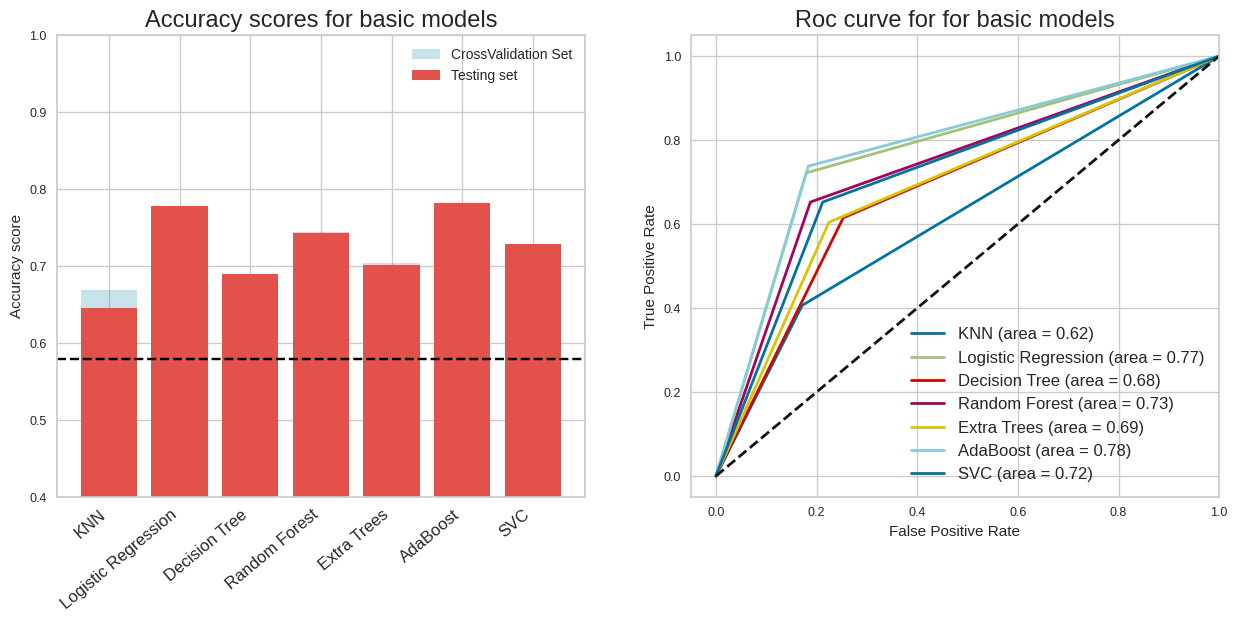

In [252]:
basic_classifiers( X_train, X_test, y_train, y_test, kfold)

AdaBoost model preformed the best with accuracy of 0.77 and AUC of 0.78, KNN having the lowest accuracy of 0.64, and AUC of 0.62

In [253]:
def RandomForest_GridSearch(X_train, X_test, y_train, y_test, kfold):
    BOLD = '\033[1m'
    END = '\033[0m'
    print(); print(BOLD + 'Grid Search with Random Forest Classifier Model:' + END)
    #kfold=5
    rf_params = {
        #'n_estimators': [10, 50, 100, 150, 200, 250],
        'max_features':[2, 3, 5, 7, 8],
        #'max_depth': [1, 2, 3, 4, 5, 8],
        #'criterion':['gini', 'entropy'],
    }

    random_forest = RandomForestClassifier(n_estimators=100)
    gs = GridSearchCV(random_forest, param_grid=rf_params, cv=5, verbose = 1)
    gs_pred, gs_test, gs_train = model_metrics(gs, kfold, X_train, X_test, y_train, y_test)
    
    return gs.best_estimator_, gs_pred, gs_test, gs_train


def ExtraTrees_GridSearch(X_train, X_test, y_train, y_test, kfold):
    BOLD = '\033[1m'
    END = '\033[0m'
    print(); print(BOLD + 'Grid Search with Extra Trees Model:' + END)
    # Scaling 
      
    rf_params = {
        #'n_estimators': [10, 100, 400, 800, 1100, 1850],
        #'max_features':['auto'],
        'max_depth': [1, 2, 3, 4, 5, 8],
        #'criterion':['gini'],
    }

    extra_trees = ExtraTreesClassifier(n_estimators=100)    
    gs = GridSearchCV(extra_trees, param_grid=rf_params, cv=5, verbose = 1)
    gs_pred, gs_test, gs_train = model_metrics(gs, kfold, X_train, X_test, y_train, y_test)
    
    return gs.best_estimator_, gs_pred, gs_test, gs_train

def RF_ET_GridSearch (X_train, X_test, y_train, y_test, kfold):
    rf_gs_best_estimator, rf_pred, rf_test, rf_train = RandomForest_GridSearch(X_train, X_test, y_train, y_test, kfold)
    et_gs_best_estimator, et_pred, et_test, et_train = ExtraTrees_GridSearch(X_train, X_test, y_train, y_test, kfold)
    
    fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(13,6))

    fig.suptitle("Random Forest and Extra Trees with Grid Search", fontsize=16)
    #bar chart of accuracy scores
    inds = range(1,3)
    labels = ["Random Forest", "Extra Trees" ]
    scores_all = [rf_train, et_train]
    scores_predictive = [rf_test, et_test]
    
    ax1.bar(inds, scores_all, color=sns.color_palette(color)[5], alpha=0.3, hatch="x", edgecolor="none",label="CrossValidation Set") #
    ax1.bar(inds, scores_predictive, color=sns.color_palette(color)[0], label="Testing set")
    ax1.set_ylim(0.4, 1)
    ax1.set_ylabel("Accuracy score")
    ax1.axhline(0.5793, color="black", linestyle="--")
    ax1.set_title("Accuracy scores", fontsize=17)
    ax1.set_xticks(range(1,3))
    ax1.set_xticklabels(labels, size=14)
    ax1.legend()

    labels = ["Random Forest", "Extra Trees" ]
    for label, pred in zip(labels, [rf_pred, et_pred]):
        fpr, tpr, threshold = roc_curve(y_test.values, pred)
        roc_auc = auc(fpr, tpr)
        ax2.plot(fpr, tpr, label=label+' (area = %0.2f)' % roc_auc, linewidth=2)
    ax2.plot([0, 1], [0, 1], 'k--', linewidth=2)
    ax2.set_xlim([-0.05, 1.0])
    ax2.set_ylim([-0.05, 1.05])
    ax2.set_xlabel('False Positive Rate')
    ax2.set_ylabel('True Positive Rate')
    ax2.legend(loc="lower right", prop={'size': 14})
    ax2.set_title("Roc curve", fontsize=17)

    plt.show()

In [254]:
RandomForest_GridSearch(X_train, X_test, y_train, y_test, kfold)


Grid Search with Random Forest Classifier Model:
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
CV scores:  [0.73863636 0.74431818 0.75428571 0.66285714 0.74285714]
CV Standard Deviation:  0.03326540162874953

CV Mean score:  0.7285909090909091
Train score:    1.0
Test score:     0.7407407407407407



Confusion Matrix: 
[[200  45]
 [ 67 120]]
Classification Report:  
              precision    recall  f1-score   support

           0       0.75      0.82      0.78       245
           1       0.73      0.64      0.68       187

    accuracy                           0.74       432
   macro avg       0.74      0.73      0.73       432
weighted avg       0.74      0.74      0.74 

(RandomForestClassifier(max_features=8),
 array([0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
        1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
        0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
        0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
        0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
        1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
        0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
        0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 



Grid Search with Random Forest Classifier Model Accuracy =  0.7407407407407407

Grid Search with Extra Trees Classifier Model Accuracy = 0.7285909090909091

In [255]:
# Predicting without the time related column (overall_survival_months)

X_no_time = dummies_df.drop(['death_from_cancer', 'overall_survival','overall_survival_months' ], axis=1)
y_no_time = dummies_df['overall_survival']

X_train_no_time, X_test_no_time, y_train_no_time, y_test_no_time = train_test_split(X_no_time, y_no_time, test_size=0.33, random_state=42, stratify = y)




K Neighbors Classifier Model:
CV scores:  [0.65340909 0.67045455 0.65714286 0.63428571 0.66285714]
CV Standard Deviation:  0.012122693168639898

CV Mean score:  0.6556298701298701
Train score:    1.0
Test score:     0.6319444444444444



Confusion Matrix: 
[[198  47]
 [112  75]]
Classification Report:  
              precision    recall  f1-score   support

           0       0.64      0.81      0.71       245
           1       0.61      0.40      0.49       187

    accuracy                           0.63       432
   macro avg       0.63      0.60      0.60       432
weighted avg       0.63      0.63      0.61       432


Logistic Regression Model:
CV scores:  [0.67045455 0.69886364 0.71428571 0.67428571 0.68571429]
CV Standard Deviation:  0.016171016386001123

CV Mean score:  0.6887207792207792
Train score:    0.7331812998859749
Test score:     0.6712962962962963



Confusion Matrix: 
[[186  59]
 [ 83 104]]
Classification Report:  
              precision    recall  f1-score   sup

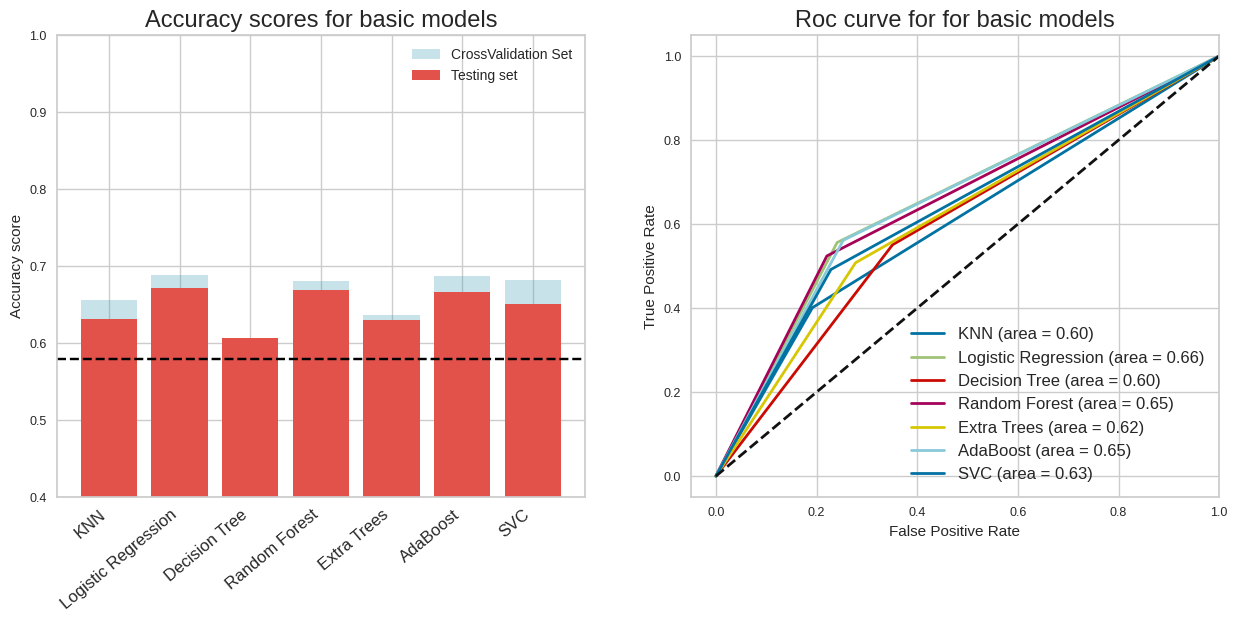

In [256]:
basic_classifiers( X_train_no_time, X_test_no_time, y_train_no_time, y_test_no_time, kfold)



Without survival time duration, the preductor for overall survival performs worse than predictor with survival time duration



In [257]:
RandomForest_GridSearch(X_train, X_test, y_train, y_test, kfold)


Grid Search with Random Forest Classifier Model:
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
CV scores:  [0.73295455 0.69886364 0.78285714 0.70857143 0.79428571]
CV Standard Deviation:  0.038605154917053165

CV Mean score:  0.7435064935064934
Train score:    1.0
Test score:     0.7546296296296297



Confusion Matrix: 
[[203  42]
 [ 64 123]]
Classification Report:  
              precision    recall  f1-score   support

           0       0.76      0.83      0.79       245
           1       0.75      0.66      0.70       187

    accuracy                           0.75       432
   macro avg       0.75      0.74      0.75       432
weighted avg       0.75      0.75      0.75

(RandomForestClassifier(max_features=8),
 array([1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
        0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
        0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
        0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
        1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
        0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
        0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
        0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
        0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 

In [258]:
# Classification with only genetic attributes

# data splitting
X = df3.drop(['patient_id', 'overall_survival'], axis=1)
y = df3['overall_survival']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)




K Neighbors Classifier Model:
CV scores:  [0.58431373 0.63137255 0.6        0.61960784 0.63529412]
CV Standard Deviation:  0.019307503725633193

CV Mean score:  0.6141176470588235
Train score:    0.6635294117647059
Test score:     0.6693163751987281



Confusion Matrix: 
[[287  77]
 [131 134]]
Classification Report:  
              precision    recall  f1-score   support

           0       0.69      0.79      0.73       364
           1       0.64      0.51      0.56       265

    accuracy                           0.67       629
   macro avg       0.66      0.65      0.65       629
weighted avg       0.66      0.67      0.66       629


Logistic Regression Model:
CV scores:  [0.61960784 0.66666667 0.64705882 0.62745098 0.63921569]
CV Standard Deviation:  0.016339346396862464

CV Mean score:  0.6399999999999999
Train score:    0.7607843137254902
Test score:     0.629570747217806



Confusion Matrix: 
[[265  99]
 [134 131]]
Classification Report:  
              precision    recall  

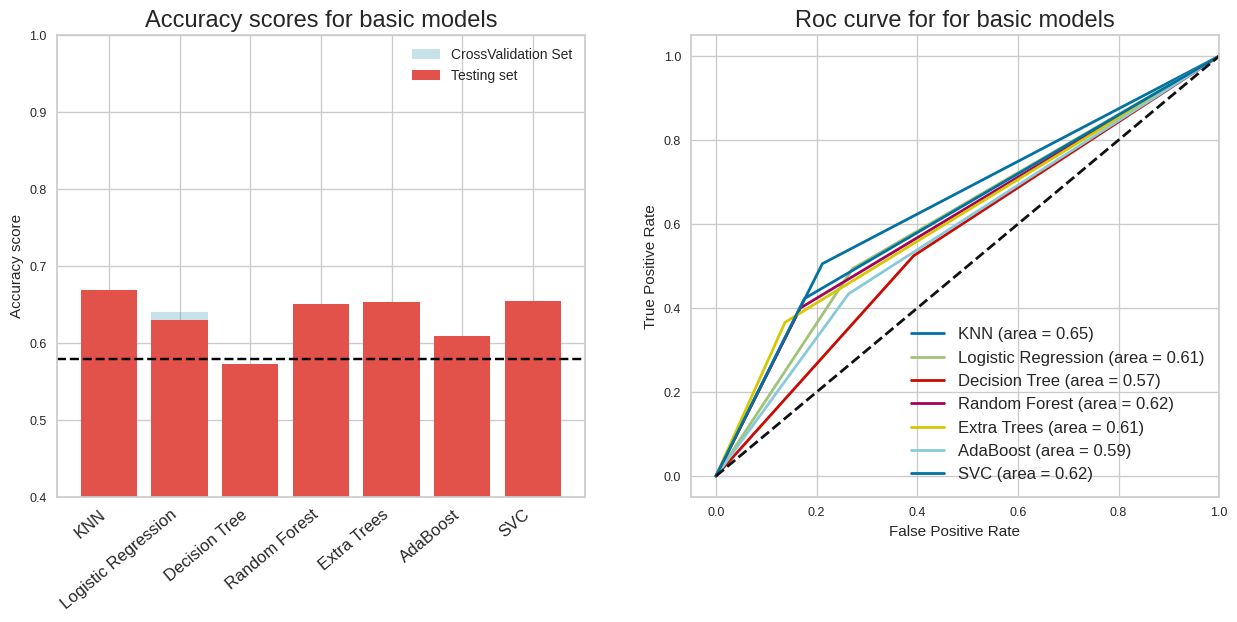

In [259]:
basic_classifiers( X_train, X_test, y_train, y_test, kfold)

In [260]:
RandomForest_GridSearch(X_train, X_test, y_train, y_test, kfold)


Grid Search with Random Forest Classifier Model:
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
CV scores:  [0.59607843 0.67058824 0.63137255 0.61568627 0.62745098]
CV Standard Deviation:  0.024477625936199565

CV Mean score:  0.628235294117647
Train score:    1.0
Test score:     0.6375198728139905



Confusion Matrix: 
[[307  57]
 [171  94]]
Classification Report:  
              precision    recall  f1-score   support

           0       0.64      0.84      0.73       364
           1       0.62      0.35      0.45       265

    accuracy                           0.64       629
   macro avg       0.63      0.60      0.59       629
weighted avg       0.63      0.64      0.61 

(RandomForestClassifier(max_features=8),
 array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
        1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
        1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
        0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
        0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
        1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 

In [261]:
# Classification with all attributes

features_to_drop = df.columns[520:]
df = df.drop(features_to_drop, axis=1)
all_categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
unwanted_columns = ['patient_id','death_from_cancer' ]
all_categorical_columns = [ele for ele in all_categorical_columns if ele not in unwanted_columns] 
dummies_df = pd.get_dummies(df.drop('patient_id',axis=1 ), columns= all_categorical_columns, dummy_na=True)
dummies_df.dropna(inplace = True)

In [262]:
X = dummies_df.drop( ['death_from_cancer','overall_survival'], axis=1)
y = dummies_df['overall_survival']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


K Neighbors Classifier Model:
CV scores:  [0.61428571 0.61428571 0.62679426 0.66985646 0.66985646]
CV Standard Deviation:  0.025592236691669344

CV Mean score:  0.6390157211209843
Train score:    0.6609360076408787
Test score:     0.6450381679389313



Confusion Matrix: 
[[114  44]
 [ 49  55]]
Classification Report:  
              precision    recall  f1-score   support

           0       0.70      0.72      0.71       158
           1       0.56      0.53      0.54       104

    accuracy                           0.65       262
   macro avg       0.63      0.63      0.63       262
weighted avg       0.64      0.65      0.64       262


Logistic Regression Model:
CV scores:  [0.68095238 0.70952381 0.70813397 0.75119617 0.70813397]
CV Standard Deviation:  0.022518747630622504

CV Mean score:  0.7115880610617453
Train score:    0.8882521489971347
Test score:     0.7519083969465649



Confusion Matrix: 
[[122  36]
 [ 29  75]]
Classification Report:  
              precision    recall 

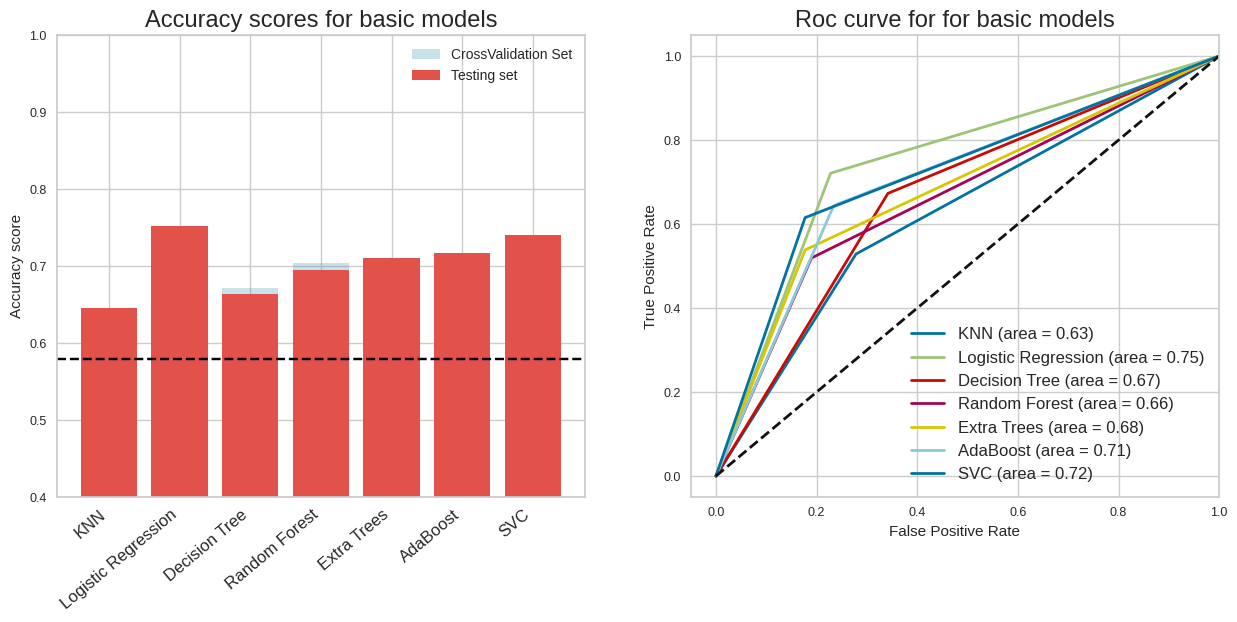

In [263]:
basic_classifiers( X_train, X_test, y_train, y_test, kfold)

In [264]:
RandomForest_GridSearch(X_train, X_test, y_train, y_test, kfold)



Grid Search with Random Forest Classifier Model:
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
CV scores:  [0.68095238 0.66190476 0.65550239 0.66985646 0.63157895]
CV Standard Deviation:  0.016539386164905044

CV Mean score:  0.6599589883800411
Train score:    1.0
Test score:     0.6984732824427481



Confusion Matrix: 
[[135  23]
 [ 56  48]]
Classification Report:  
              precision    recall  f1-score   support

           0       0.71      0.85      0.77       158
           1       0.68      0.46      0.55       104

    accuracy                           0.70       262
   macro avg       0.69      0.66      0.66       262
weighted avg       0.69      0.70      0.68

(RandomForestClassifier(max_features=8),
 array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
        0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
        0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
        0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
        0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]),
 0.6984732824427481,
 0.6599589883800411)